In [1]:
from tools import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
import random, math, copy

In [2]:
itemNum=10 #物品数目
Bin=[40,40] #箱子宽度与高度
ran=list(range(itemNum))

# N1

In [3]:

N1 = [
    [7, 6],
    [40, 16],
    [5, 20],
    [24, 24],
    [7, 4],
    [4, 4],
    [7, 8],
    [4, 20],
    [5, 4],
    [7, 6]
]

AllItem = np.array(N1)

print(AllItem)


[[ 7  6]
 [40 16]
 [ 5 20]
 [24 24]
 [ 7  4]
 [ 4  4]
 [ 7  8]
 [ 4 20]
 [ 5  4]
 [ 7  6]]


# Bottom-Left

utilisation: 0.5275


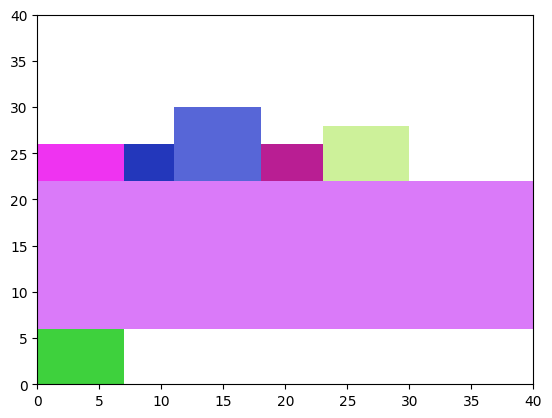

utilisation: 0.4725


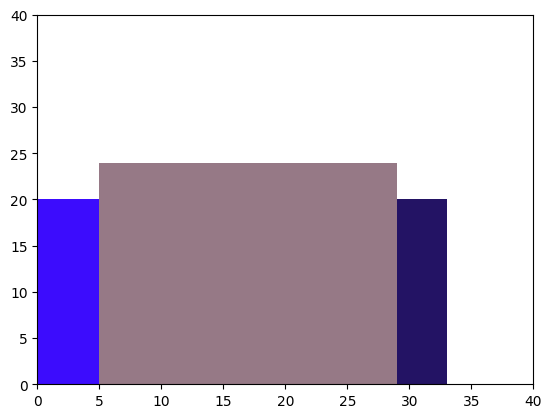

Average utilisation: 0.5
Running time: 0.2830231189727783 seconds


In [6]:
def bottom_left(itemNum, AllItem, Bin):
    ran = list(range(itemNum))

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # start packing
    #print(list(flagItem).count(0))
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  #The starting points are all at the top right corner of the bin.
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) #If overlap flagOL=1; vice versa flagOL=0
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) #Update the coordinates of the top-right corner vertex of the item after moving it down and left from its current position to its final position.
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) # Record the rectangle that fits into the box [ID,width,height].
                        flagItem[ran[j]]=1

            #utilisation
            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            #visualisation
            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))

# BL(bottom-left) Sorted by area (width * height)

utilisation: 0.8725


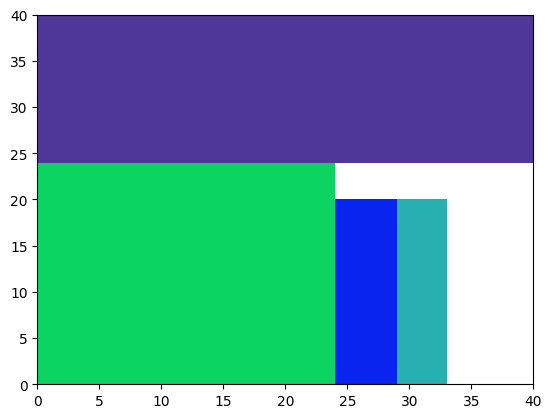

utilisation: 0.1275


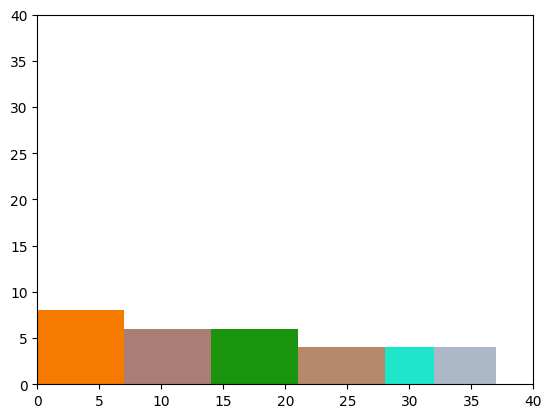

Average utilisation: 0.5
Running time: 0.24572372436523438 seconds


In [14]:
def bottom_left_sorted(itemNum, AllItem, Bin):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # Start packing.
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) 
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) 
                        flagItem[ran[j]]=1

            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_sorted(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))
        

# Bottom-left-fill (BLF) algorithm

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
utilisation: 1.0


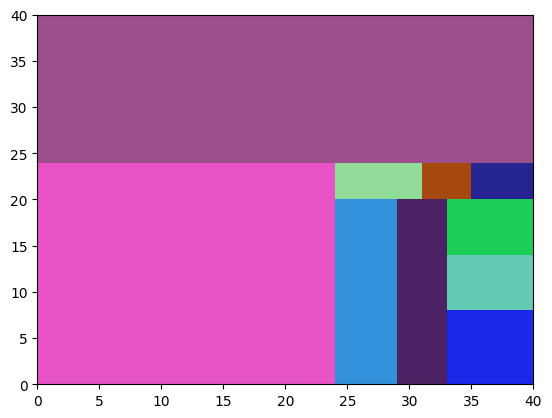

Average utilisation: 1.0
Running time: 0.12496256828308105 seconds


In [19]:
bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)  # Initially a 0 matrix, representing an empty bin
def find_largest_blank_region(bin_matrix):
    rows, cols = bin_matrix.shape
    max_width, max_height, max_area = 0, 0, 0
    start_row, start_col = 0, 0

    for r in range(rows):
        for c in range(cols):
            if bin_matrix[r, c] == 0:
                width, height = 0, 0
                while c + width < cols and bin_matrix[r, c + width] == 0:
                    width += 1
                while r + height < rows and bin_matrix[r + height, c] == 0:
                    height += 1
                area = width * height

                if area > max_area:
                    max_width, max_height, max_area = width, height, area
                    start_row, start_col = r, c

    return start_row, start_col, max_width, max_height

def bottom_left_fill(itemNum, AllItem, Bin, bin_matrix):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing

    for i in range(itemNum):
        if list(flagItem).count(0) > 0:
            BinNum = BinNum + 1
            RPNXY = []
            bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)
            for j in range(itemNum):
                if flagItem[ran[j]] == 0:
                    item = AllItem[ran[j], :]
                    itemRP = Bin  
                    flagOL = overlap(item, AllItem, itemRP, RPNXY)  
                    if flagOL == 0:
                        itemRP = finalPos(item, AllItem, itemRP, RPNXY)  
                        RPNXY.append([ran[j], itemRP[0], itemRP[1]])  
                        flagItem[ran[j]] = 1

                        # Update bin matrix with occupied areas of the item
                        width, height = item
                        lx, ly = itemRP[0] - width, itemRP[1] - height
                        bin_matrix[ly:itemRP[1], lx:itemRP[0]] += 1
            print(bin_matrix)

            # Find and try to place remaining items in the blank regions
            while True:
                start_row, start_col, max_width, max_height = find_largest_blank_region(bin_matrix)
                if max_width < 1 or max_height < 1:
                    break

                # Check if any remaining item can fit in the largest blank region
                remaining_items = [ran[j] for j in range(itemNum) if flagItem[ran[j]] == 0]
                item_placed = False
                for j in remaining_items:
                    width, height = AllItem[j, :]
                    if width <= max_width and height <= max_height:
                        # Temporarily place the item in the largest blank region
                        bin_matrix[start_row:start_row + height, start_col:start_col + width] += 1
                        RPNXY.append([j, start_col + width, start_row + height])  # 记录装进箱子的矩形【ID,width,height】
                        flagItem[j] = 1
                        item_placed = True
                        break

                # Check if the bin matrix is still valid (all values <= 1)
                if np.max(bin_matrix) <= 1:
                    if not item_placed:
                        break
                else:
                    # Roll back to the previous state and remove the last item placement
                    bin_matrix[start_row:start_row + max_height, start_col:start_col + max_width] = 0
                    RPNXY.pop()

            rect_area = np.sum(bin_matrix)  # Count the number of occupied cells (ones) in the bin_matrix
            bin_area = np.prod(Bin)  # Total number of cells in the bin_matrix
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width, height = AllItem[i[0]]
                rx, ry = i[1], i[2]
                lx, ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width, height, linewidth=1, facecolor=color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            # plt.savefig('result.png')

    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_fill(itemNum, AllItem, Bin, bin_matrix)
end_time = time.time()

print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))


# LLABF

# ABC with BL

utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.59
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.605
utilisation:0.6
utilisation:0.555
utilisation:0.59
utilisation:0.8075
utilisation:0.8875
utilisation:0.24
utilisation:0.5425
utilisation:0.6
utilisation:0.5425
utilisation:0.5275
utilisation:0.55
utilisation:0.605
utilisation:0.5275
utilisation:0.5425
utilisation:0.6
utilisation:0.56375
utilisation:0.5275
utilisation:0.87
utilisation:0.9737

utilisation:0.6
utilisation:0.55125
utilisation:0.82125
utilisation:0.8875
utilisation:0.5875
utilisation:0.5025
utilisation:0.5275
utilisation:0.59
utilisation:0.51625
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.84875
utilisation:0.4875
utilisation:0.55125
utilisation:0.51625
utilisation:0.6
utilisation:0.57875
utilisation:0.49
utilisation:0.86375
utilisation:0.525
utilisation:0.5275
utilisation:0.64
utilisation:0.5025
utilisation:0.24
utilisation:0.64
utilisation:0.84875
utilisation:0.51625
utilisation:0.92375
utilisation:0.6
utilisation:0.915
utilisation:0.56375
utilisation:0.8725
utilisation:0.87625
utilisation:0.89875
utilisation:0.5525
utilisation:0.555
utilisation:0.50875
utilisation:0.5275
utilisation:0.5275
utilisation:0.59
utilisation:0.6
utilisation:0.55125
utilisation:0.6
utilisation:0.5275
utilisation:0.4875
utilisation:0.605
utilisation:0.64
utilisation:0.64
utilisation:0.82125
utilisation:0.5375
utilisation:0.6
utilisation:0.52875
utilisation:0.925


utilisation:0.85
utilisation:0.8875
utilisation:0.795
utilisation:0.61375
utilisation:0.6
utilisation:0.92125
utilisation:0.605
utilisation:0.6
utilisation:0.5775
utilisation:0.5375
utilisation:0.6
utilisation:0.885
utilisation:0.9025
utilisation:0.64
utilisation:0.5775
utilisation:0.5375
utilisation:0.5275
utilisation:0.5275
utilisation:0.8125
utilisation:0.5525
utilisation:0.87625
utilisation:0.9825
utilisation:0.6
utilisation:0.5275
utilisation:0.5375
utilisation:0.49
utilisation:0.5025
utilisation:0.5425
utilisation:0.5275
utilisation:0.6
utilisation:0.5525
utilisation:0.88375
utilisation:0.875
utilisation:0.6
utilisation:0.24
utilisation:0.5275
utilisation:0.605
utilisation:0.5025
utilisation:0.59
utilisation:0.85125
utilisation:0.6
utilisation:0.5875
utilisation:0.605
utilisation:0.64
utilisation:0.64
utilisation:0.49
utilisation:0.8775
utilisation:0.61375
utilisation:0.61375
utilisation:0.5275
utilisation:0.61375
utilisation:0.57875
utilisation:0.64
utilisation:0.51625
utilisati

utilisation:0.61375
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.49
utilisation:0.5275
utilisation:0.5275
utilisation:0.5525
utilisation:0.51625
utilisation:0.64
utilisation:0.57875
utilisation:0.9175
utilisation:0.6
utilisation:0.5275
utilisation:0.55
utilisation:0.77
utilisation:0.9375
utilisation:0.5375
utilisation:0.96375
utilisation:0.5025
utilisation:0.5525
utilisation:0.605
utilisation:0.55125
utilisation:0.57875
utilisation:0.6
utilisation:0.92
utilisation:0.61375
utilisation:0.965
utilisation:0.5375
utilisation:0.49
utilisation:0.57875
utilisation:0.6
utilisation:0.6
utilisation:0.79875
utilisation:0.76
utilisation:0.5275
utilisation:0.59
utilisation:0.61375
utilisation:0.6
utilisation:0.91125
utilisation:0.9325
utilisation:0.5425
utilisation:0.5275
utilisation:0.55
utilisation:0.5025
utilisation:0.5275
utilisation:0.5275
utilisation:0.5775
utilisation:0.6
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.5275
utilisation:

utilisation:0.6
utilisation:0.7875
utilisation:0.4875
utilisation:0.64
utilisation:0.6
utilisation:0.4875
utilisation:0.9275
utilisation:0.92125
utilisation:0.6275
utilisation:0.55125
utilisation:0.93375
utilisation:0.76
utilisation:0.8575
utilisation:0.5775
utilisation:0.5275
utilisation:0.6
utilisation:0.81625
utilisation:0.6
utilisation:0.605
utilisation:0.5525
utilisation:0.8575
utilisation:0.4875
utilisation:0.56375
utilisation:0.6
utilisation:0.77
utilisation:0.56375
utilisation:0.64
utilisation:0.64
utilisation:0.89
utilisation:0.55
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.56375
utilisation:0.51625
utilisation:0.96375
utilisation:0.64
utilisation:0.5275
utilisation:0.5525
utilisation:0.6
utilisation:0.6
utilisation:0.56375
utilisation:0.525
utilisation:0.5375
utilisation:0.64
utilisation:0.8225
utilisation:0.5375
utilisation:0.965
utilisation:0.24
utilisation:0.64
utilisation:0.52875
utilisation:0.64
utilisation:0.6
utilisation:0.56375
utilisation:0.4875

utilisation:0.5275
utilisation:0.77
utilisation:0.52875
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.77
utilisation:0.5425
utilisation:0.99
utilisation:0.5375
utilisation:0.6
utilisation:0.8875
utilisation:0.8875
utilisation:0.5775
utilisation:0.5275
utilisation:0.5775
utilisation:0.8425
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.5275
utilisation:0.555
utilisation:0.56375
utilisation:0.52875
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.6
utilisation:0.52875
utilisation:0.555
utilisation:0.555
utilisation:0.64
utilisation:0.9025
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.5375
utilisation:0.5275
utilisation:0.5375
utilisation:0.6
utilisation:0.55125
utilisation:0.8875
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.59
utilisation:0.6
utilisation:0.61375
utilisation:0.5375
utilisation:0.83875
utilisation:0.64
utilisation:0.5275
util

utilisation:0.51625
utilisation:0.5275
utilisation:0.64
utilisation:0.55125
utilisation:0.605
utilisation:0.4875
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.95
utilisation:0.64
utilisation:0.6225
utilisation:0.6
utilisation:0.6
utilisation:0.8125
utilisation:0.605
utilisation:0.78625
utilisation:0.6
utilisation:0.49
utilisation:0.81
utilisation:0.51625
utilisation:0.6
utilisation:0.8875
utilisation:0.5025
utilisation:0.6
utilisation:0.64
utilisation:0.80375
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.59
utilisation:0.85875
utilisation:0.605
utilisation:0.6
utilisation:0.51625
utilisation:0.6
utilisation:0.525
utilisation:0.6
utilisation:0.605
utilisation:0.61375
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5875
utilisation:0.855
utilisation:0.5275
utilisation:0.6
utilisation:0.84875
utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.525
utilisation:0.64
utilisation:0.64
utili

utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.5525
utilisation:0.8875
utilisation:0.5025
utilisation:0.6
utilisation:0.605
utilisation:0.5275
utilisation:0.6
utilisation:0.5525
utilisation:0.85875
utilisation:0.64
utilisation:0.61375
utilisation:0.55125
utilisation:0.6
utilisation:0.5275
utilisation:0.61375
utilisation:0.81375
utilisation:0.64
utilisation:0.795
utilisation:0.5375
utilisation:0.49
utilisation:0.9025
utilisation:0.8225
utilisation:0.5275
utilisation:0.64
utilisation:0.84625
utilisation:0.52875
utilisation:0.64
utilisation:0.64
utilisation:0.88875
utilisation:0.4875
utilisation:0.5775
utilisation:0.5775
utilisation:0.5275
utilisation:0.55125
utilisation:0.5275
utilisation:0.51625
utilisation:0.64
utilisation:0.59
utilisation:0.6
utilisation:0.64
utilisation:0.525
utilisation:0.84625
utilisation:0.5275
utilisation:0.61375
utilisation:0.87625
utilisation:0.64
utilisation:0.925
utilisation:0.64
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisatio

utilisation:0.57875
utilisation:0.52875
utilisation:0.5525
utilisation:0.6
utilisation:0.5025
utilisation:0.835
utilisation:0.83625
utilisation:0.61375
utilisation:0.8675
utilisation:0.8875
utilisation:0.86125
utilisation:0.5275
utilisation:0.5375
utilisation:0.6
utilisation:0.6
utilisation:0.5775
utilisation:0.605
utilisation:0.5025
utilisation:0.87125
utilisation:0.6
utilisation:0.56375
utilisation:0.5875
utilisation:1.0
utilisation:0.64
utilisation:0.92125
utilisation:0.5525
utilisation:0.5275
utilisation:0.6
utilisation:0.84
utilisation:0.93875
utilisation:0.915
utilisation:0.5775
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.52875
utilisation:0.49
utilisation:0.88125
utilisation:0.59
utilisation:0.56375
utilisation:0.6
utilisation:0.5025
utilisation:0.6
utilisation:0.64
utilisation:0.82125
utilisation:0.5425
utilisation:0.6
utilisation:0.5275
utilisation:1.0
utilisation:0.6
utilisation:0.5425
utilisation:0.89875
utilisation:0.6
utilisation:0.5275
utilisation:0.8

utilisation:0.6
utilisation:0.84875
utilisation:0.6
utilisation:0.56375
utilisation:0.5275
utilisation:0.5275
utilisation:0.52875
utilisation:0.51625
utilisation:0.6
utilisation:0.87125
utilisation:0.56375
utilisation:0.8725
utilisation:0.6
utilisation:0.6
utilisation:0.7775
utilisation:0.5775
utilisation:0.5875
utilisation:0.61375
utilisation:0.87
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.885
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.49
utilisation:0.56375
utilisation:0.56375
utilisation:0.56375
utilisation:0.64
utilisation:0.8825
utilisation:0.9825
utilisation:0.55125
utilisation:0.875
utilisation:0.8725
utilisation:0.57875
utilisation:0.6
utilisation:0.6
utilisation:0.52875
utilisation:0.8975
utilisation:0.5275
utilisation:0.8775
utilisation:0.55125
utilisation:0.5375
utilisation:0.61375
utilisation:0.6
utilisation:0.55625
utilisation:0.88875
utilisation:0.525
utilisation:0.855
utilisation:0.85875
utilisation:0.8975
utili

utilisation:1.0
utilisation:0.5275
utilisation:0.6
utilisation:0.57875
utilisation:0.79625
utilisation:0.55
utilisation:0.64
utilisation:0.525
utilisation:0.5275
utilisation:0.51625
utilisation:0.49
utilisation:0.5275
utilisation:0.5025
utilisation:0.875
utilisation:0.5275
utilisation:0.76
utilisation:0.5775
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.24
utilisation:0.57875
utilisation:0.85875
utilisation:0.5275
utilisation:0.8725
utilisation:0.4875
utilisation:0.57875
utilisation:0.51625
utilisation:0.61375
utilisation:0.64
utilisation:0.85875
utilisation:0.835
utilisation:0.61375
utilisation:0.605
utilisation:0.52875
utilisation:0.6
utilisation:0.64
utilisation:0.56375
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.9075
utilisation:0.525
utilisation:0.59
utilisation:0.64
utilisation:0.8225
utilisation:0.555
utilisation:0.565
utilisation:0.5275
utilisation:0.5875
utilisation:0.6
utilisation:0.5275
utilis

utilisation:0.64
utilisation:0.24
utilisation:0.59
utilisation:0.8875
utilisation:0.61375
utilisation:0.525
utilisation:0.79
utilisation:0.9
utilisation:0.61375
utilisation:0.6
utilisation:0.59
utilisation:0.64
utilisation:0.5275
utilisation:0.49
utilisation:0.925
utilisation:0.24
utilisation:0.55
utilisation:0.57875
utilisation:0.61375
utilisation:0.64
utilisation:0.6
utilisation:0.845
utilisation:0.49
utilisation:0.5275
utilisation:0.64
utilisation:0.5775
utilisation:0.7725
utilisation:0.61375
utilisation:0.835
utilisation:0.91125
utilisation:0.8775
utilisation:0.7725
utilisation:0.59
utilisation:0.64
utilisation:0.6
utilisation:0.605
utilisation:0.64
utilisation:0.51625
utilisation:0.24
utilisation:0.5525
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.5375
utilisation:0.8825
utilisation:0.56375
utilisation:0.5425
utilisation:0.6
utilisation:0.6
utilisation:0.5375
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.84875
utilisation:0.6
utilisation:0

utilisation:0.55
utilisation:0.49
utilisation:0.965
utilisation:0.6
utilisation:0.5425
utilisation:0.5875
utilisation:0.64
utilisation:0.875
utilisation:0.6
utilisation:0.5525
utilisation:0.9475
utilisation:0.555
utilisation:0.64
utilisation:0.555
utilisation:0.5275
utilisation:0.5275
utilisation:0.565
utilisation:0.56375
utilisation:0.63
utilisation:0.51625
utilisation:0.61375
utilisation:0.85875
utilisation:0.5025
utilisation:0.64
utilisation:0.64
utilisation:0.525
utilisation:0.84375
utilisation:0.8225
utilisation:0.5775
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.52875
utilisation:0.61375
utilisation:0.5375
utilisation:0.56375
utilisation:0.57875
utilisation:0.59
utilisation:0.8225
utilisation:0.56375
utilisation:0.8525
utilisation:0.6
utilisation:0.6
utilisation:0.51625
utilisation:0.61375
utilisation:0.55125
utilisation:0.6
utilisation:0.61375
utilisation:0.64
utilisation:0.4875
utilisation:0.64


utilisation:0.86375
utilisation:0.5375
utilisation:0.52875
utilisation:0.5775
utilisation:0.6
utilisation:0.64
utilisation:0.8675
utilisation:0.935
utilisation:0.5025
utilisation:0.55125
utilisation:0.5275
utilisation:0.64
utilisation:0.61375
utilisation:0.61375
utilisation:0.5025
utilisation:0.52875
utilisation:0.5375
utilisation:0.875
utilisation:0.5875
utilisation:0.76
utilisation:0.6
utilisation:0.5375
utilisation:0.875
utilisation:0.56375
utilisation:0.6
utilisation:0.5525
utilisation:0.5425
utilisation:0.57375
utilisation:0.64
utilisation:0.61375
utilisation:0.64
utilisation:0.88875
utilisation:0.5025
utilisation:0.88875
utilisation:0.6
utilisation:0.55125
utilisation:0.9175
utilisation:0.84625
utilisation:0.5375
utilisation:0.6
utilisation:0.76
utilisation:0.55125
utilisation:0.555
utilisation:0.5775
utilisation:0.59
utilisation:0.605
utilisation:0.5275
utilisation:0.92
utilisation:0.605
utilisation:0.61375
utilisation:0.565
utilisation:0.55125
utilisation:0.6
utilisation:0.5025

utilisation:0.5375
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5025
utilisation:0.64
utilisation:0.5775
utilisation:0.59
utilisation:0.51625
utilisation:0.81
utilisation:0.57875
utilisation:0.81
utilisation:0.64
utilisation:0.5775
utilisation:0.8875
utilisation:0.5775
utilisation:0.6
utilisation:0.85875
utilisation:0.6
utilisation:0.5275
utilisation:0.845
utilisation:0.57875
utilisation:0.885
utilisation:0.49
utilisation:0.55125
utilisation:0.85
utilisation:0.49
utilisation:0.64
utilisation:0.9375
utilisation:0.51625
utilisation:0.5275
utilisation:0.5875
utilisation:0.61375
utilisation:0.57875
utilisation:0.6
utilisation:0.24
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.81
utilisation:0.5275
utilisation:0.64
utilisation:0.24
utilisation:0.9375
utilisation:0.6
utilisation:0.49
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.5775
utilisation:0.64
utilisation:0.551

utilisation:0.5275
utilisation:0.555
utilisation:0.55
utilisation:0.6
utilisation:0.64
utilisation:0.51625
utilisation:0.59
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.8575
utilisation:0.64
utilisation:0.84875
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.875
utilisation:0.555
utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.59
utilisation:0.79
utilisation:0.57875
utilisation:0.61375
utilisation:0.5275
utilisation:0.5025
utilisation:0.5275
utilisation:0.6
utilisation:0.56375
utilisation:0.49
utilisation:0.8175
utilisation:0.56375
utilisation:0.64
utilisation:0.63
utilisation:0.5275
utilisation:0.92375
utilisation:0.64
utilisation:0.85125
utilisation:0.5375
utilisation:0.52875
utilisation:0.59
utilisation:0.5275
utilisation:0.5525
utilisation:0.92125
utilisation:0.59
utilisation:0.6
utilisation:0.55125
utilisation:0.94625
utilisation:0.89875
utilisation:0.61375
utilisation:0.7875
u

utilisation:0.59
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.7775
utilisation:0.64
utilisation:0.5775
utilisation:0.64
utilisation:0.5425
utilisation:0.52875
utilisation:0.64
utilisation:0.4875
utilisation:0.6
utilisation:0.81625
utilisation:0.77
utilisation:0.57875
utilisation:0.6
utilisation:0.5375
utilisation:0.6
utilisation:0.49
utilisation:0.49
utilisation:0.89875
utilisation:0.80875
utilisation:0.64
utilisation:0.875
utilisation:0.5275
utilisation:0.84875
utilisation:0.5275
utilisation:0.795
utilisation:0.5275
utilisation:0.5775
utilisation:0.61375
utilisation:0.6
utilisation:0.6
utilisation:0.5375
utilisation:0.8375
utilisation:0.5275
utilisation:0.9375
utilisation:0.86375
utilisation:0.6
utilisation:0.93875
utilisation:0.64
utilisation:0.6
utilisation:0.5175
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.845
utilisation:0.6
utilisation:0.8375
utilisation

utilisation:0.64
utilisation:0.5275
utilisation:0.49
utilisation:0.55125
utilisation:0.6
utilisation:0.6
utilisation:0.85875
utilisation:0.6
utilisation:0.4875
utilisation:0.57375
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.56375
utilisation:0.56375
utilisation:0.76
utilisation:0.8225
utilisation:0.55125
utilisation:0.56375
utilisation:0.55125
utilisation:0.61375
utilisation:0.6
utilisation:0.925
utilisation:0.605
utilisation:0.99
utilisation:0.5875
utilisation:0.5025
utilisation:0.875
utilisation:0.56375
utilisation:0.64
utilisation:0.605
utilisation:0.8625
utilisation:0.61375
utilisation:0.76
utilisation:0.49
utilisation:0.7725
utilisation:0.6
utilisation:0.59
utilisation:0.64
utilisation:0.9825
utilisation:0.8125
utilisation:0.6
utilisation:0.84375
utilisation:0.24
utilisation:0.5275
utilisation:0.605
utilisation:0.85125
utilisation:0.91125
utilisation:0.24
utilisation:0.64
utilisation:0.9075
utilisation:0.86125
utilisation:0.5375
utilisation:0.5275
utilisati

utilisation:0.57875
utilisation:0.5375
utilisation:0.5275
utilisation:0.61375
utilisation:0.61375
utilisation:0.5375
utilisation:0.875
utilisation:0.5375
utilisation:0.5525
utilisation:0.64
utilisation:0.6
utilisation:0.57875
utilisation:0.78625
utilisation:0.49
utilisation:0.5275
utilisation:0.845
utilisation:0.605
utilisation:0.955
utilisation:0.61375
utilisation:0.64
utilisation:0.49
utilisation:0.5375
utilisation:0.80875
utilisation:0.85875
utilisation:0.6
utilisation:0.6
utilisation:0.5425
utilisation:0.8225
utilisation:0.24
utilisation:0.9375
utilisation:0.8875
utilisation:0.6
utilisation:0.6225
utilisation:0.5875
utilisation:0.59
utilisation:0.64
utilisation:0.86125
utilisation:0.5525
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.59
utilisation:0.24
utilisation:0.55
utilisation:0.84875
utilisation:0.5275
utilisation:0.59
utilisation:0.9025
utilisation:0.6
utilisation:0.7725
utilisation:0.5275
utilisation:0.64
utilisation:0.5775
utilisation:0.64
utilisation:0.

utilisation:0.6
utilisation:0.64
utilisation:0.55125
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.605
utilisation:0.5275
utilisation:0.5275
utilisation:0.57875
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.5425
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.56375
utilisation:0.82125
utilisation:0.82625
utilisation:0.57875
utilisation:0.4875
utilisation:0.57875
utilisation:0.87625
utilisation:0.8125
utilisation:0.64
utilisation:0.5275
utilisation:0.49
utilisation:0.4875
utilisation:0.605
utilisation:0.80375
utilisation:0.86125
utilisation:0.55125
utilisation:0.555
utilisation:0.6
utilisation:0.5275
utilisation:0.61375
utilisation:0.59
utilisation:0.76
utilisation:0.6
utilisation:0.4875
utilisation:0.64
utilisation:0.5775
utilisation:0.64
utilisation:0.55125
utilisation:0.5275
utilisation:0.52875
utilisation:0.89875
utilisation:0.5775
utilisation:0.24
utilisati

utilisation:0.86125
utilisation:0.87625
utilisation:0.49
utilisation:0.64
utilisation:0.24
utilisation:0.86375
utilisation:0.49
utilisation:0.9125
utilisation:0.5525
utilisation:0.81625
utilisation:0.5425
utilisation:0.64
utilisation:0.5375
utilisation:0.5275
utilisation:0.59
utilisation:0.5275
utilisation:0.61375
utilisation:0.8875
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.5025
utilisation:0.885
utilisation:0.7775
utilisation:0.835
utilisation:0.5025
utilisation:0.5275
utilisation:0.64
utilisation:0.5025
utilisation:0.5275
utilisation:0.605
utilisation:0.5775
utilisation:0.6
utilisation:0.605
utilisation:0.6
utilisation:0.56375
utilisation:0.525
utilisation:0.59
utilisation:0.61375
utilisation:0.64
utilisation:0.83625
utilisation:0.5275
utilisation:0.83625
utilisation:0.5275
utilisation:0.51625
utilisation:0.5275
utilisation:0.9
utilisation:0.49
utilisation:0.52875
utilisation:0.87625
utilisation:0.52875
utilisation:0.6
utilisation:0.51625
utilisation:0.84
ut

utilisation:0.64
utilisation:0.64
utilisation:0.87625
utilisation:0.5275
utilisation:0.4875
utilisation:0.9475
utilisation:0.5275
utilisation:0.9475
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.525
utilisation:0.24
utilisation:0.24
utilisation:0.59
utilisation:0.59
utilisation:0.525
utilisation:0.6
utilisation:0.5275
utilisation:0.91125
utilisation:0.6
utilisation:0.64
utilisation:0.555
utilisation:0.64
utilisation:0.97
utilisation:0.6
utilisation:0.52875
utilisation:0.5275
utilisation:0.84625
utilisation:0.5275
utilisation:0.91125
utilisation:0.84875
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.605
utilisation:0.55
utilisation:0.5775
utilisation:0.59
utilisation:0.7775
utilisation:0.605
utilisation:0.78625
utilisation:0.6
utilisation:0.6
utilisation:0.76
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.49
utilisation:0.64
utilisation:0.605
utilisation:0.55125
utilisation:0.502

utilisation:0.5275
utilisation:0.59
utilisation:0.4875
utilisation:0.64
utilisation:0.56375
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.49
utilisation:0.5275
utilisation:0.5375
utilisation:0.6
utilisation:0.6
utilisation:0.9375
utilisation:0.5525
utilisation:0.85375
utilisation:0.5275
utilisation:0.6
utilisation:0.83625
utilisation:0.78625
utilisation:0.61375
utilisation:0.6
utilisation:0.6
utilisation:0.57875
utilisation:0.795
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.79625
utilisation:0.82125
utilisation:0.64
utilisation:0.6
utilisation:0.5375
utilisation:0.6
utilisation:0.59
utilisation:0.57875
utilisation:0.64
utilisation:0.92
utilisation:0.6
utilisation:0.5275
utilisation:0.57375
utilisation:0.81
utilisation:0.55
utilisation:0.5775
utilisation:0.89
utilisation:0.92
utilisation:0.8225
utilisation:0.605
utilisation:0.6275
utilisation:0.55125
utilisation:0.64
utilisation:0.

utilisation:0.64
utilisation:0.6
utilisation:0.79625
utilisation:0.6
utilisation:0.51625
utilisation:0.6275
utilisation:0.52875
utilisation:0.865
utilisation:0.5275
utilisation:0.64
utilisation:0.8575
utilisation:0.85
utilisation:0.51625
utilisation:0.5275
utilisation:0.61375
utilisation:0.6
utilisation:0.51625
utilisation:0.64
utilisation:0.5775
utilisation:0.61375
utilisation:0.49
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.91
utilisation:0.89875
utilisation:0.5275
utilisation:0.8725
utilisation:0.845
utilisation:0.4875
utilisation:0.845
utilisation:0.5275
utilisation:0.52875
utilisation:0.5775
utilisation:0.605
utilisation:0.7875
utilisation:0.7825
utilisation:0.51625
utilisation:0.85125
utilisation:0.9475
utilisation:0.24
utilisation:0.6
utilisation:0.5275
utilisation:0.59
utilisation:0.6
utilisation:0.61375
utilisation:0.24
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.90125
utilisation:0.57375
utilisation:0.6
utilisation:0.5375
utilisatio

utilisation:0.51625
utilisation:0.55
utilisation:0.7725
utilisation:0.4875
utilisation:0.5775
utilisation:0.6
utilisation:0.5775
utilisation:0.83625
utilisation:0.605
utilisation:0.6
utilisation:0.83875
utilisation:0.81625
utilisation:0.6
utilisation:0.5375
utilisation:0.5775
utilisation:0.85875
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.93
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.4875
utilisation:0.5275
utilisation:0.9375
utilisation:0.5375
utilisation:0.6
utilisation:0.5275
utilisation:0.5375
utilisation:0.9375
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.8325
utilisation:0.64
utilisation:0.9475
utilisation:0.64
utilisation:0.64
utilisation:0.51625
utilisation:0.52875
utilisation:0.5775
utilisation:0.5375
utilisation:0.52875
utilisation:0.5375
utilisation:0.86125
utilisation:0.64
utilisation:0.56375
utilisation:0.5775
utilisation:0.52875
utili

utilisation:0.555
utilisation:0.61375
utilisation:0.51625
utilisation:0.52875
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.87625
utilisation:0.64
utilisation:0.7775
utilisation:0.5275
utilisation:0.5275
utilisation:0.95
utilisation:0.5275
utilisation:0.9025
utilisation:0.5375
utilisation:0.64
utilisation:0.8775
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.605
utilisation:0.5425
utilisation:0.6
utilisation:0.52875
utilisation:0.555
utilisation:0.5275
utilisation:0.64
utilisation:0.605
utilisation:0.5375
utilisation:0.87625
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.52875
utilisation:0.64
utilisation:0.5025
utilisation:0.5275
utilisation:0.64
utilisation:0.61375
utilisation:0.55125
utilisation:0.77
utilisation:0.6
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.6
utilisation:0.795


utilisation:0.83125
utilisation:0.55125
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.8175
utilisation:0.52875
utilisation:0.84
utilisation:0.6
utilisation:0.4875
utilisation:0.57875
utilisation:0.4875
utilisation:0.51625
utilisation:0.4875
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.5025
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.80875
utilisation:0.64
utilisation:0.5275
utilisation:0.55125
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.64
utilisation:0.605
utilisation:0.5525
utilisation:0.6
utilisation:0.5025
utilisation:0.84
utilisation:0.55
utilisation:0.64
utilisation:0.6
utilisation:0.605
utilisation:0.5025
utilisation:0.91125
utilisation:0.55
utilisation:0.96375
utilisation:0.5275
utilisation:0.5275
utilisation:0.59
utilisation:0.55125
utilisation:0.6
utilisation:0.51625
utilisation:0.5525
utilisation:0.605
utilisation:0.5275
utilisation:0.5275
utilisation:0.84

utilisation:0.6
utilisation:0.6
utilisation:0.9025
utilisation:0.52875
utilisation:0.5275
utilisation:0.64
utilisation:0.97375
utilisation:0.51625
utilisation:0.795
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.97375
utilisation:0.8
utilisation:0.8875
utilisation:0.6
utilisation:0.6
utilisation:0.55125
utilisation:0.5275
utilisation:0.4875
utilisation:0.6
utilisation:0.525
utilisation:0.6
utilisation:0.5025
utilisation:0.6
utilisation:0.88375
utilisation:0.5275
utilisation:0.91125
utilisation:0.9475
utilisation:0.85875
utilisation:0.61375
utilisation:0.64
utilisation:0.64
utilisation:0.915
utilisation:0.5025
utilisation:0.875
utilisation:0.5525
utilisation:0.61375
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.5025
utilisation:0.61375
utilisation:0.49
utilisation:0.89875
utilisation:0.5025
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.64
utilisation:0.8825
utilisation:0.99
utilisation:0.6
utilisation:0.5775
uti

utilisation:0.6
utilisation:0.57875
utilisation:0.9025
utilisation:0.56375
utilisation:0.5425
utilisation:0.5375
utilisation:0.56375
utilisation:0.52875
utilisation:0.83875
utilisation:0.8975
utilisation:0.51625
utilisation:0.5875
utilisation:0.605
utilisation:0.9375
utilisation:0.78625
utilisation:0.5525
utilisation:0.56375
utilisation:0.64
utilisation:0.5275
utilisation:0.8825
utilisation:0.5275
utilisation:0.6
utilisation:0.8075
utilisation:0.5275
utilisation:0.49
utilisation:0.55125
utilisation:0.6
utilisation:0.55
utilisation:0.5275
utilisation:0.8875
utilisation:0.51625
utilisation:0.8725
utilisation:0.59
utilisation:0.49
utilisation:0.8175
utilisation:0.92
utilisation:0.8575
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.57375
utilisation:0.55125
utilisation:0.61375
utilisation:0.55
utilisation:0.6
utilisation:0.59
utilisation:0.51625
utilisation:0.84
utilisation:0.5025
utilisation:0.92375
utilisation:0.5275
utilisation:0.8575
utilisation:0.

utilisation:0.57875
utilisation:0.5875
utilisation:0.77
utilisation:0.6
utilisation:0.96375
utilisation:0.59
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.88875
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.56375
utilisation:0.76
utilisation:0.5275
utilisation:0.9875
utilisation:0.5525
utilisation:0.605
utilisation:0.7875
utilisation:0.55
utilisation:0.61375
utilisation:0.5275
utilisation:0.915
utilisation:0.80875
utilisation:0.5275
utilisation:0.64
utilisation:0.555
utilisation:0.64
utilisation:0.91625
utilisation:0.64
utilisation:0.59
utilisation:0.52875
utilisation:0.5275
utilisation:0.5375
utilisation:0.59
utilisation:0.85
utilisation:0.78625
utilisation:0.49
utilisation:0.61375
utilisation:0.6
utilisation:0.8875
utilisation:0.555
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.52875
utilisation:0.5275
utilisation:0.5775
utilisation:0.55125
utilisation:0.49
utilisation:0.5525
utilisation:0.6
utilisatio

utilisation:0.52875
utilisation:0.5275
utilisation:0.91125
utilisation:0.52875
utilisation:0.5775
utilisation:0.6
utilisation:0.6
utilisation:0.525
utilisation:0.64
utilisation:0.24
utilisation:0.8875
utilisation:0.76
utilisation:0.49
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.76
utilisation:0.6
utilisation:0.24
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.96375
utilisation:0.24
utilisation:0.51625
utilisation:0.55125
utilisation:0.82125
utilisation:0.5375
utilisation:0.5875
utilisation:0.56375
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.51625
utilisation:0.525
utilisation:0.5875
utilisation:0.605
utilisation:0.61375
utilisation:0.64
utilisation:0.52875
utilisation:0.59
utilisation:0.86125
utilisation:0.5275
utilisation:0.8675
utilisation:0.90875
utilisation:0.52875
utilisation:0.91125
utilisation:0.605
utilisation:0.6
utilisation:0.78625
utilisation:0.64
utilisation:0.64
utilisation:0.5025
utilisati

utilisation:0.64
utilisation:0.64
utilisation:0.55125
utilisation:0.5525
utilisation:0.6
utilisation:0.5275
utilisation:0.8175
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.605
utilisation:0.5275
utilisation:0.9025
utilisation:0.6
utilisation:0.5275
utilisation:0.96125
utilisation:0.55
utilisation:0.51625
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.61375
utilisation:0.91125
utilisation:0.5275
utilisation:0.64
utilisation:0.5525
utilisation:0.64
utilisation:0.51625
utilisation:0.4875
utilisation:0.84625
utilisation:0.5275
utilisation:0.64
utilisation:0.52875
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.5725
utilisation:0.605
utilisation:0.64
utilisation:0.84625
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.51625
utilisation:0.51625
utilisation:0.64
utilisation:0.6275
utilisation:0.5275
utilisation:0.86125
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0

utilisation:0.5025
utilisation:0.84625
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.56375
utilisation:0.6
utilisation:0.5275
utilisation:0.90125
utilisation:0.6
utilisation:0.79625
utilisation:0.52875
utilisation:0.6
utilisation:0.61375
utilisation:0.81
utilisation:0.51625
utilisation:0.56375
utilisation:0.6
utilisation:0.55
utilisation:0.525
utilisation:0.6
utilisation:0.64
utilisation:0.8525
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.51625
utilisation:0.61375
utilisation:0.9375
utilisation:0.885
utilisation:0.64
utilisation:0.6
utilisation:0.84875
utilisation:0.51625
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.5425
utilisation:0.64
utilisation:0.6
utilisation:0.52875
utilisation:0.64
utilisation:0.5375
utilisation:0.5275
utilisation:0.5275
utilisation:0.55
utilisation:0.64
utilisation:0.5375
utilisation:0.55
utilisation:0.64
utilisation:0.5375

utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.8575
utilisation:0.5275
utilisation:0.56375
utilisation:0.64
utilisation:0.9375
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.4875
utilisation:0.64
utilisation:0.61375
utilisation:0.605
utilisation:0.6
utilisation:0.90125
utilisation:0.5275
utilisation:0.83375
utilisation:0.55125
utilisation:0.87625
utilisation:0.6
utilisation:0.85875
utilisation:0.5025
utilisation:0.5775
utilisation:0.64
utilisation:0.85875
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.9075
utilisation:0.51625
utilisation:0.61375
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.55125
utilisation:0.93875
utilisation:0.6
utilisation:0.6
utilisation:0.49
utilisation:0.6
utilisation:0.64
utilisation:0.52875
utilisation:0.56375
utilisation:0.5275
utilisation:0.5375
utilisation:0.51625
utilisation:0.85375
utilisation:0.83125
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.55125
util

utilisation:0.5875
utilisation:0.525
utilisation:0.8775
utilisation:0.61375
utilisation:0.9375
utilisation:0.8775
utilisation:0.61375
utilisation:0.5875
utilisation:0.4875
utilisation:0.59
utilisation:0.5275
utilisation:0.5275
utilisation:0.57875
utilisation:0.5775
utilisation:0.4875
utilisation:0.9375
utilisation:0.61375
utilisation:0.59
utilisation:0.6
utilisation:0.6
utilisation:0.85875
utilisation:0.86125
utilisation:0.51625
utilisation:0.9375
utilisation:0.5025
utilisation:0.8525
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.5275
utilisation:0.8975
utilisation:0.5275
utilisation:0.51625
utilisation:0.78625
utilisation:0.56375
utilisation:0.835
utilisation:0.5425
utilisation:0.5275
utilisation:0.55
utilisation:0.5275
utilisation:0.56375
utilisation:0.7725
utilisation:0.6
utilisation:0.56375
utilisation:0.555
utilisation:0.64
utilisation:0.64
utilisation:0.92
utilisation:0.78625
utilisation:0.92
utilisation:0.875
utilisation:0.555
utilisation:0.81
utilisation:0.

utilisation:0.5875
utilisation:0.64
utilisation:0.5025
utilisation:0.5275
utilisation:0.64
utilisation:0.49
utilisation:0.52875
utilisation:0.8225
utilisation:0.8325
utilisation:0.87125
utilisation:0.605
utilisation:0.51625
utilisation:0.64
utilisation:0.5875
utilisation:0.5875
utilisation:0.5275
utilisation:0.6
utilisation:0.61375
utilisation:0.9375
utilisation:0.5275
utilisation:0.4875
utilisation:0.59
utilisation:0.64
utilisation:0.90875
utilisation:0.61375
utilisation:0.84625
utilisation:0.61375
utilisation:0.565
utilisation:0.91125
utilisation:0.64
utilisation:0.5275
utilisation:0.565
utilisation:0.555
utilisation:0.85875
utilisation:0.56375
utilisation:0.51625
utilisation:0.5375
utilisation:0.6
utilisation:0.64
utilisation:0.8325
utilisation:0.6
utilisation:0.57875
utilisation:0.78625
utilisation:0.6
utilisation:0.97375
utilisation:0.805
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.77
utilisation:0.5025
utilisation:0.5775
utilisation:0.64
utilisation:0.64
util

utilisation:0.6
utilisation:0.5025
utilisation:0.96375
utilisation:0.64
utilisation:0.92
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.8275
utilisation:0.5275
utilisation:0.8
utilisation:0.535
utilisation:0.5025
utilisation:0.57875
utilisation:0.91125
utilisation:0.64
utilisation:0.64
utilisation:0.5775
utilisation:0.4875
utilisation:0.59
utilisation:0.82125
utilisation:0.6
utilisation:0.6
utilisation:0.61375
utilisation:0.64
utilisation:0.8925
utilisation:0.64
utilisation:0.49
utilisation:0.6
utilisation:0.6
utilisation:0.84625
utilisation:0.5275
utilisation:0.525
utilisation:0.92125
utilisation:0.59
utilisation:0.82625
utilisation:0.875
utilisation:0.6
utilisation:0.83
utilisation:0.57875
utilisation:0.55125
utilisation:0.64
utilisation:0.82125
utilisation:0.5375
utilisation:0.5025
utilisation:0.6
utilisation:0.81375
utilisation:0.76
utilisation:0.61375
utilisation:0.5775
utilisation:0.64
utilisation:0.4875
utilisation:0.5775
utilisation:0.4875
utilisation:0.5375
u

utilisation:0.5275
utilisation:0.49
utilisation:0.55125
utilisation:0.5275
utilisation:0.5775
utilisation:0.6
utilisation:0.57875
utilisation:0.94625
utilisation:0.4875
utilisation:0.5775
utilisation:0.85875
utilisation:0.88375
utilisation:0.6
utilisation:0.5275
utilisation:0.86375
utilisation:0.52875
utilisation:0.64
utilisation:0.5775
utilisation:0.51625
utilisation:0.51625
utilisation:0.6
utilisation:0.59
utilisation:0.51625
utilisation:0.5275
utilisation:0.61375
utilisation:0.93875
utilisation:0.49
utilisation:0.61375
utilisation:0.5875
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.51625
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.8525
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.61375
utilisation:0.4875
utilisation:0.6
utilisation:0.56375
utilisation:0.61375
utilisation:0.85
utilisation:0.51625
utilisation:0.88125
utilisation:0.80875
utilisation:0.64
utilisation:0.86125
utilisation:0.885
utilisation:0.5775
ut

utilisation:0.5775
utilisation:0.55125
utilisation:0.5525
utilisation:0.76
utilisation:0.5775
utilisation:0.5025
utilisation:0.49
utilisation:0.5025
utilisation:0.76
utilisation:0.81625
utilisation:0.86125
utilisation:0.5375
utilisation:0.4875
utilisation:0.92375
utilisation:0.5025
utilisation:0.605
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.52875
utilisation:0.9
utilisation:0.5375
utilisation:0.5775
utilisation:0.5375
utilisation:0.6
utilisation:0.6
utilisation:0.605
utilisation:0.7825
utilisation:0.5275
utilisation:0.6
utilisation:0.5775
utilisation:0.80875
utilisation:0.94
utilisation:0.5275
utilisation:0.8975
utilisation:0.565
utilisation:0.8225
utilisation:0.5275
utilisation:0.9125
utilisation:0.5375
utilisation:0.64
utilisation:0.51625
utilisation:0.55125
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.92875
utilisation:0.52875
utilisation:0.525
utilisation:0.5375
utilisation:0.90625
utilisation:0.6
utilisation:0.5375
utilisation:0.64
utilis

utilisation:0.6
utilisation:0.64
utilisation:0.4875
utilisation:0.61375
utilisation:0.6
utilisation:0.90625
utilisation:0.5025
utilisation:0.5275
utilisation:0.87875
utilisation:0.64
utilisation:0.56375
utilisation:0.5025
utilisation:0.8425
utilisation:0.5275
utilisation:0.6
utilisation:0.5875
utilisation:0.64
utilisation:0.64
utilisation:0.92375
utilisation:0.6
utilisation:0.5775
utilisation:0.49
utilisation:0.6
utilisation:0.51625
utilisation:0.84875
utilisation:0.6
utilisation:0.5775
utilisation:0.64
utilisation:0.82
utilisation:0.8625
utilisation:0.6
utilisation:0.925
utilisation:0.52875
utilisation:0.875
utilisation:0.835
utilisation:0.76
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.61375
utilisation:0.64
utilisation:0.77
utilisation:0.6
utilisation:0.8875
utilisation:0.56375
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.52875
utilisation:0.565
utilisation:0.64
utilisation:0.5375
utilisation:0.89
utilisation:0.61375
utilisation:0.64
utilisa

utilisation:0.57875
utilisation:0.8275
utilisation:0.6
utilisation:0.6
utilisation:0.555
utilisation:0.5275
utilisation:0.495
utilisation:0.59
utilisation:0.59
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.5275
utilisation:1.0
utilisation:0.5875
utilisation:0.5275
utilisation:0.87625
utilisation:0.61375
utilisation:0.61375
utilisation:0.56125
utilisation:0.78625
utilisation:0.6
utilisation:0.6
utilisation:0.56375
utilisation:0.80875
utilisation:0.57875
utilisation:0.8875
utilisation:0.6
utilisation:0.49
utilisation:0.55
utilisation:0.64
utilisation:0.9175
utilisation:0.56375
utilisation:0.64
utilisation:0.49
utilisation:0.5375
utilisation:0.4875
utilisation:0.56375
utilisation:0.64
utilisation:0.885
utilisation:0.49
utilisation:0.93875
utilisation:0.61375
utilisation:0.8675
utilisation:0.5275
utilisation:0.56375
utilisation:0.49
utilisation:0.52875
utilisation:0.6
utilisation:0.49
utilisation:0.56375
utilisation:0.6
utilisation:0.525
utilisation:0.84625
utilisation:

utilisation:0.89875
utilisation:0.64
utilisation:0.5025
utilisation:0.49
utilisation:0.5775
utilisation:0.49
utilisation:0.64
utilisation:0.56375
utilisation:0.9475
utilisation:0.87125
utilisation:0.605
utilisation:0.79625
utilisation:0.5775
utilisation:0.61375
utilisation:0.6
utilisation:0.49
utilisation:0.8875
utilisation:0.61375
utilisation:0.8125
utilisation:0.5375
utilisation:0.64
utilisation:0.59
utilisation:0.5875
utilisation:0.49
utilisation:0.90875
utilisation:0.61375
utilisation:0.6
utilisation:0.89875
utilisation:0.9175
utilisation:0.6
utilisation:0.555
utilisation:0.6
utilisation:0.57875
utilisation:0.61375
utilisation:0.5275
utilisation:0.8975
utilisation:0.64
utilisation:0.55125
utilisation:0.9375
utilisation:0.91125
utilisation:0.6
utilisation:0.6
utilisation:0.85375
utilisation:0.64
utilisation:0.5025
utilisation:0.61375
utilisation:0.8325
utilisation:0.895
utilisation:0.5375
utilisation:0.4875
utilisation:0.6
utilisation:0.83375
utilisation:0.55125
utilisation:0.555
ut

utilisation:0.9375
utilisation:0.76
utilisation:0.59
utilisation:0.81375
utilisation:0.49
utilisation:0.79625
utilisation:0.5025
utilisation:0.6
utilisation:0.6
utilisation:0.51625
utilisation:0.55
utilisation:0.57375
utilisation:0.64
utilisation:0.4875
utilisation:0.64
utilisation:0.965
utilisation:0.5275
utilisation:0.9175
utilisation:0.76
utilisation:0.6
utilisation:0.64
utilisation:0.7725
utilisation:0.6
utilisation:0.57875
utilisation:0.6
utilisation:0.9125
utilisation:0.64
utilisation:0.55125
utilisation:0.8825
utilisation:0.965
utilisation:0.76
utilisation:0.64
utilisation:0.925
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.85875
utilisation:0.6
utilisation:0.51625
utilisation:0.89
utilisation:0.5775
utilisation:0.61375
utilisation:0.6
utilisation:0.92375
utilisation:0.64
utilisation:0.96125
utilisation:0.5275
utilisation:0.5275
utilisation:0.91125
utilisation:0.605
utilisation:0.55125
utilisation:0.5275
utilisation:0.6
utilisation:0.81375
utilisation:0.76
ut

utilisation:0.90125
utilisation:0.5775
utilisation:0.84875
utilisation:0.6
utilisation:0.5275
utilisation:0.9025
utilisation:0.81
utilisation:0.85125
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.525
utilisation:0.5375
utilisation:0.7875
utilisation:0.5375
utilisation:0.6
utilisation:0.5275
utilisation:0.8125
utilisation:0.925
utilisation:0.8825
utilisation:0.605
utilisation:0.5375
utilisation:0.80375
utilisation:0.24
utilisation:0.5275
utilisation:0.5525
utilisation:0.6
utilisation:0.89875
utilisation:0.9375
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.605
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.825
utilisation:0.5375
utilisation:0.57875
utilisation:0.6
utilisation:0.64
utilisation:0.92875
utilisation:0.5275
utilisation:0.6
utilisation:0.5375
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.5375
utilisation:0.64
utilisation:0.5275
utilisation:0.5025
utilisation:0.61375
utilisation:0.9275
utilisation:0.6

utilisation:0.24
utilisation:0.525
utilisation:0.52875
utilisation:0.5275
utilisation:0.61375
utilisation:0.6
utilisation:0.5375
utilisation:0.6
utilisation:0.24
utilisation:0.80375
utilisation:0.61375
utilisation:0.5275
utilisation:0.92
utilisation:0.5375
utilisation:0.64
utilisation:0.64
utilisation:0.835
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.5375
utilisation:0.78625
utilisation:0.64
utilisation:0.87625
utilisation:0.52875
utilisation:0.55125
utilisation:0.6
utilisation:0.5275
utilisation:0.5525
utilisation:0.5275
utilisation:0.5025
utilisation:0.5275
utilisation:0.5525
utilisation:0.4875
utilisation:0.6
utilisation:0.64
utilisation:0.5375
utilisation:0.5025
utilisation:0.49
utilisation:0.795
utilisation:0.6
utilisation:0.64
utilisation:0.525
utilisation:0.5275
utilisation:0.64
utilisation:0.93875
utilisation:0.5275
utilisation:0.5275
utilisation:0.92625
utilisation:0.61375
utilisation:0.64
utilisation:0.59
utilisation:0.76
utilisation:0.60

utilisation:0.6
utilisation:0.78625
utilisation:0.56375
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.86125
utilisation:0.4875
utilisation:0.6
utilisation:0.535
utilisation:0.88875
utilisation:0.85
utilisation:0.875
utilisation:0.5275
utilisation:0.8275
utilisation:0.5025
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.61375
utilisation:0.885
utilisation:0.6
utilisation:0.77
utilisation:0.64
utilisation:0.49
utilisation:0.57875
utilisation:0.5275
utilisation:0.4875
utilisation:0.76
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.57875
utilisation:0.61375
utilisation:0.5375
utilisation:0.96125
utilisation:0.5525
utilisation:0.56375
utilisation:0.64
utilisation:0.4875
utilisation:0.6
utilisation:0.59
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.89875
utilisation:0.51625
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.8875
utilisation:0.88875
utilisation:0.64
utilisation:0.63
utilisation:0.64
utilisation

utilisation:0.5275
utilisation:0.5275
utilisation:0.86625
utilisation:0.76
utilisation:0.5275
utilisation:0.64
utilisation:0.89
utilisation:0.79
utilisation:0.64
utilisation:0.8375
utilisation:0.6
utilisation:0.57875
utilisation:0.5025
utilisation:0.51625
utilisation:0.52875
utilisation:0.5375
utilisation:0.5375
utilisation:0.5375
utilisation:0.6
utilisation:0.59
utilisation:0.64
utilisation:0.5275
utilisation:0.5375
utilisation:0.51625
utilisation:0.4875
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.55125
utilisation:0.79625
utilisation:0.5025
utilisation:0.86
utilisation:0.59
utilisation:0.5375
utilisation:0.5275
utilisation:0.89375
utilisation:0.5275
utilisation:0.5875
utilisation:0.64
utilisation:0.5775
utilisation:0.61375
utilisation:0.965
utilisation:0.6
utilisation:0.64
utilisation:0.8975
utilisation:0.64
utilisation:0.64
utilisation:0.24
utilisation:0.845
utilisation:0.795
utilisation:0.5275
utilisation:0.49
utilisation:0.5025
utilisation:0.85875
utilisatio

utilisation:0.5275
utilisation:0.825
utilisation:0.6
utilisation:0.64
utilisation:0.77
utilisation:0.82125
utilisation:0.81375
utilisation:0.64
utilisation:0.5375
utilisation:0.605
utilisation:0.5275
utilisation:0.55125
utilisation:0.7725
utilisation:0.5775
utilisation:0.64
utilisation:0.8575
utilisation:0.59
utilisation:0.49
utilisation:0.8125
utilisation:0.5275
utilisation:0.5025
utilisation:0.61375
utilisation:0.64
utilisation:0.51625
utilisation:0.6
utilisation:0.6
utilisation:0.55
utilisation:0.5275
utilisation:0.605
utilisation:0.6
utilisation:0.5275
utilisation:0.605
utilisation:0.84875
utilisation:0.6
utilisation:0.64
utilisation:0.24
utilisation:0.855
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.7725
utilisation:0.5275
utilisation:0.52875
utilisation:0.81
utilisation:0.5525
utilisation:0.85875
utilisation:0.64
utilisation:0.64
utilisation:0.52875
utilisation:0.76
utilisation:0.6
utilisation:0.6
utilisation:0.5375
utilisation:0.5375
utilisat

utilisation:0.5275
utilisation:0.5275
utilisation:0.5425
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.55125
utilisation:0.61375
utilisation:0.6
utilisation:0.5275
utilisation:0.5775
utilisation:0.52875
utilisation:0.9075
utilisation:0.56375
utilisation:0.6
utilisation:0.925
utilisation:0.6
utilisation:0.8925
utilisation:0.5275
utilisation:0.64
utilisation:0.51625
utilisation:0.6
utilisation:0.82625
utilisation:0.49
utilisation:0.5375
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.85375
utilisation:0.5775
utilisation:0.6
utilisation:0.64
utilisation:0.5375
utilisation:0.64
utilisation:0.555
utilisation:0.91125
utilisation:0.4875
utilisation:0.8625
utilisation:0.6
utilisation:0.89
utilisation:0.6
utilisation:0.9375
utilisation:0.8175
utilisation:0.795
utilisation:0.95
utilisation:0.51625
utilisation:0.61375
utilisation:0.91
utilisation:0.64
utilisation:0.79625
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
util

utilisation:0.6
utilisation:0.90125
utilisation:0.87625
utilisation:0.52875
utilisation:0.64
utilisation:0.5775
utilisation:0.9025
utilisation:0.5275
utilisation:0.52875
utilisation:0.57875
utilisation:0.76
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.525
utilisation:0.6
utilisation:0.59
utilisation:0.5275
utilisation:0.9775
utilisation:0.55
utilisation:0.91125
utilisation:0.6
utilisation:0.5425
utilisation:0.87125
utilisation:0.61375
utilisation:0.6
utilisation:0.81625
utilisation:0.5275
utilisation:0.5375
utilisation:0.24
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.525
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.82125
utilisation:0.64
utilisation:0.8125
utilisation:0.64
utilisation:0.55125
utilisation:0.5775
utilisation:0.61375
utilisation:0.6
utilisation:0.4875
utilisation:0.64
utilisation:0.9025
utilisation:0.6
utilisation:0.875
utilisation:0.81375
utilisation:0.5275
utilisat

utilisation:0.5275
utilisation:0.59
utilisation:0.24
utilisation:0.59
utilisation:0.61375
utilisation:0.51625
utilisation:0.52875
utilisation:0.5375
utilisation:0.6
utilisation:0.555
utilisation:0.6
utilisation:0.605
utilisation:0.64
utilisation:0.56375
utilisation:0.55125
utilisation:0.52875
utilisation:0.4875
utilisation:0.6
utilisation:0.57875
utilisation:0.85875
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.525
utilisation:0.57875
utilisation:0.5275
utilisation:0.5275
utilisation:0.55125
utilisation:0.6
utilisation:0.6
utilisation:0.605
utilisation:0.52875
utilisation:0.5275
utilisation:0.605
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.55
utilisation:0.6
utilisation:0.85375
utilisation:0.64
utilisation:0.56375
utilisation:0.4875
utilisation:0.52875
utilisation:0.84625
utilisation:0.5375
utilisation:0.8225
utilisation:0.605
utilisation:0.55
utilisation:0.6
utilisation:0.6
ut

utilisation:0.6
utilisation:0.59
utilisation:0.64
utilisation:0.51625
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.76
utilisation:0.64
utilisation:0.9275
utilisation:0.5275
utilisation:0.555
utilisation:0.835
utilisation:0.8275
utilisation:0.55125
utilisation:0.6225
utilisation:0.8225
utilisation:0.805
utilisation:0.64
utilisation:0.55
utilisation:0.56375
utilisation:0.9375
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.5875
utilisation:0.6
utilisation:0.64
utilisation:0.91125
utilisation:0.49
utilisation:0.91125
utilisation:0.55
utilisation:0.59
utilisation:0.605
utilisation:0.605
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.57875
utilisation:0.9825
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.8575
utilisation:0.76
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.5375
utilisation:0.605
utilisation:0.87625
utilisation:0.5275
utilisation:

utilisation:0.5275
utilisation:0.61375
utilisation:0.9775
utilisation:0.6
utilisation:0.63
utilisation:0.55
utilisation:0.5275
utilisation:0.82125
utilisation:0.6
utilisation:0.85375
utilisation:0.6
utilisation:0.605
utilisation:0.64
utilisation:0.5025
utilisation:0.64
utilisation:0.57875
utilisation:0.52875
utilisation:0.8825
utilisation:0.6
utilisation:0.55125
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.9375
utilisation:0.79625
utilisation:0.5375
utilisation:0.61375
utilisation:0.5275
utilisation:0.84375
utilisation:0.8825
utilisation:0.6
utilisation:0.85875
utilisation:0.5525
utilisation:0.49
utilisation:0.64
utilisation:0.6
utilisation:0.9025
utilisation:0.89875
utilisation:0.52875
utilisation:0.8875
utilisation:0.64
utilisation:0.64
utilisation:0.52875
utilisation:0.64
utilisation:0.9375
utilisation:0.5875
utilisation:0.6
utilisation:0.51625
utilisation:0.6
utilisation:0.6
utilisation:0.96125
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisati

utilisation:0.5375
utilisation:0.64
utilisation:0.5425
utilisation:0.9825
utilisation:0.64
utilisation:0.8675
utilisation:0.6
utilisation:0.5275
utilisation:0.89375
utilisation:0.24
utilisation:0.64
utilisation:0.52875
utilisation:0.965
utilisation:0.5275
utilisation:0.605
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.5375
utilisation:0.525
utilisation:0.6
utilisation:0.49
utilisation:0.79625
utilisation:0.51625
utilisation:0.5775
utilisation:0.605
utilisation:0.59
utilisation:0.57875
utilisation:0.895
utilisation:0.55
utilisation:0.85875
utilisation:0.5275
utilisation:0.89875
utilisation:0.5275
utilisation:0.64
utilisation:0.51625
utilisation:0.51625
utilisation:0.6
utilisation:0.6
utilisation:0.88875
utilisation:0.57875
utilisation:0.64
utilisation:0.5275
utilisation:0.86125
utilisation:0.56375
utilisation:0.4875
utilisation:0.85
utilisation:0.86125
utilisation:0.8475
utilisation:0.61375
utilisation:0.525
utilisation:0.5375
utilisation:0.64
utilisation:0.5775
u

utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.5375
utilisation:0.5275
utilisation:0.875
utilisation:0.5025
utilisation:0.5875
utilisation:0.61375
utilisation:0.6
utilisation:0.5025
utilisation:0.64
utilisation:0.6
utilisation:0.52875
utilisation:0.61375
utilisation:0.79875
utilisation:0.61375
utilisation:0.61375
utilisation:0.8075
utilisation:0.5275
utilisation:0.64
utilisation:0.91125
utilisation:0.6
utilisation:0.5375
utilisation:0.61375
utilisation:0.64
utilisation:0.92
utilisation:0.5275
utilisation:0.84375
utilisation:0.64
utilisation:0.5775
utilisation:0.6
utilisation:0.52875
utilisation:0.92
utilisation:0.57875
utilisation:0.64
utilisation:0.6
utilisation:0.82125
utilisation:0.61375
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.80375
utilisation:0.51625
utilisation:0.64
utilisation:0.64
utilisation:0.9375
utilisation:0.5275
utilisation:0.96125
utilisation:0.49
utilisation:0.59
utilisation:0.57875
utilisa

utilisation:0.6
utilisation:0.55
utilisation:0.5025
utilisation:0.59
utilisation:0.51625
utilisation:0.86125
utilisation:0.5275
utilisation:0.5275
utilisation:0.5375
utilisation:0.52875
utilisation:0.5275
utilisation:0.555
utilisation:0.5375
utilisation:0.64
utilisation:0.64
utilisation:0.8475
utilisation:0.95
utilisation:0.9725
utilisation:0.6
utilisation:0.6
utilisation:0.605
utilisation:0.605
utilisation:0.51625
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.59
utilisation:0.6
utilisation:0.64
utilisation:0.49
utilisation:0.8
utilisation:0.64
utilisation:0.88
utilisation:0.5375
utilisation:0.6
utilisation:0.61375
utilisation:0.51625
utilisation:0.54375
utilisation:0.76
utilisation:0.55125
utilisation:0.6
utilisation:0.6
utilisation:0.9375
utilisation:0.64
utilisation:0.55125
utilisation:0.8875
utilisation:0.525
utilisation:0.91125
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.8525
utilisation:0.8125
utilisation:0.5375
util

utilisation:0.6
utilisation:0.56375
utilisation:0.5425
utilisation:0.76
utilisation:0.56375
utilisation:0.8875
utilisation:0.6
utilisation:0.5375
utilisation:0.91125
utilisation:0.64
utilisation:0.51625
utilisation:0.5275
utilisation:0.51625
utilisation:0.8675
utilisation:0.92
utilisation:0.64
utilisation:0.5375
utilisation:0.5375
utilisation:0.84875
utilisation:0.51625
utilisation:0.78625
utilisation:0.5275
utilisation:0.64
utilisation:0.76
utilisation:0.6
utilisation:0.64
utilisation:0.55125
utilisation:0.64
utilisation:0.6
utilisation:0.49
utilisation:0.865
utilisation:0.5775
utilisation:0.6
utilisation:0.82125
utilisation:0.5425
utilisation:0.51625
utilisation:0.79
utilisation:0.6
utilisation:0.92
utilisation:0.9275
utilisation:0.6
utilisation:0.5025
utilisation:0.52875
utilisation:0.64
utilisation:0.4875
utilisation:0.49
utilisation:0.87625
utilisation:0.57875
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.6

utilisation:0.55
utilisation:0.91125
utilisation:0.57875
utilisation:0.6
utilisation:0.6
utilisation:0.605
utilisation:0.5375
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.61375
utilisation:0.64
utilisation:0.5025
utilisation:0.9375
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.5375
utilisation:0.5775
utilisation:0.57875
utilisation:0.5375
utilisation:0.5275
utilisation:0.555
utilisation:0.6
utilisation:0.525
utilisation:0.64
utilisation:0.5025
utilisation:0.87625
utilisation:0.5375
utilisation:0.5425
utilisation:0.64
utilisation:0.61375
utilisation:0.64
utilisation:0.565
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.5375
utilisation:0.5525
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.5875
utilisation:0.49
utilisation:0.83375
utilisation:0.6
utilisation:0.95
utilisation:0.97375
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.64
utilisation:0.55

utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.8425
utilisation:0.6
utilisation:0.76
utilisation:0.57875
utilisation:0.525
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.7825
utilisation:0.64
utilisation:0.6
utilisation:0.965
utilisation:0.52875
utilisation:0.61375
utilisation:0.80375
utilisation:0.61375
utilisation:0.8975
utilisation:0.76
utilisation:0.5025
utilisation:0.6
utilisation:0.52875
utilisation:0.525
utilisation:0.6
utilisation:0.84875
utilisation:0.885
utilisation:0.5375
utilisation:0.6
utilisation:0.76
utilisation:0.8875
utilisation:0.64
utilisation:0.56375
utilisation:0.5275
utilisation:0.64
utilisation:0.86625
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.51625
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.89875
utilisation:0.52875
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.52875
utilisatio

utilisation:0.8875
utilisation:0.64
utilisation:0.5775
utilisation:0.8175
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.79
utilisation:0.5275
utilisation:0.6
utilisation:0.61375
utilisation:0.56375
utilisation:0.5275
utilisation:0.49
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.4875
utilisation:0.89375
utilisation:0.64
utilisation:0.52875
utilisation:0.5275
utilisation:0.5775
utilisation:0.55125
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.61375
utilisation:0.6
utilisation:0.5275
utilisation:0.9425
utilisation:0.85125
utilisation:0.85875
utilisation:0.525
utilisation:0.6
utilisation:0.875
utilisation:0.59
utilisation:0.6
utilisation:0.8475
utilisation:0.52875
utilisation:0.64
utilisation:0.6
utilisation:0.4875
utilisation:0.85
utilisation:0.5275
utilisation:0.51625
utilisation:0.24
utilisation:0.525
utilisation:0.56375
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utili

utilisation:0.5025
utilisation:0.91125
utilisation:0.61375
utilisation:0.8175
utilisation:0.555
utilisation:0.56375
utilisation:0.24
utilisation:0.64
utilisation:0.87125
utilisation:0.5025
utilisation:0.90625
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.8875
utilisation:0.6
utilisation:0.5375
utilisation:0.5375
utilisation:0.8125
utilisation:0.88125
utilisation:0.5275
utilisation:0.6
utilisation:0.4875
utilisation:0.64
utilisation:0.92375
utilisation:0.61375
utilisation:0.64
utilisation:0.55125
utilisation:0.4875
utilisation:0.24
utilisation:0.64
utilisation:0.51625
utilisation:0.5275
utilisation:0.84
utilisation:0.61375
utilisation:0.605
utilisation:0.89875
utilisation:0.59
utilisation:0.49
utilisation:0.84375
utilisation:0.57875
utilisation:0.605
utilisation:0.5275
utilisation:0.6
utilisation:0.61375
utilisation:0.56375
utilisation:0.6
utilisation:0.835
utilisation:0.5525
utilisation:0.8975
utilisation:0.885
utilisation:0.51625
utilisation:0.59
utilisation:0.6

utilisation:0.6
utilisation:0.9875
utilisation:0.5025
utilisation:0.55125
utilisation:0.76
utilisation:0.92375
utilisation:0.61375
utilisation:0.57875
utilisation:0.49
utilisation:0.64
utilisation:0.61375
utilisation:0.59
utilisation:0.52875
utilisation:0.64
utilisation:0.835
utilisation:0.85875
utilisation:0.86625
utilisation:0.61375
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.51625
utilisation:0.5875
utilisation:0.51625
utilisation:0.605
utilisation:0.5275
utilisation:0.555
utilisation:0.605
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.52875
utilisation:0.64
utilisation:0.5525
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.8225
utilisation:0.8
utilisation:0.9775
utilisation:0.80875
utilisation:0.59
utilisation:0.6
utilisation:0.875
utilisation:0.61375
utilisation:0.9325
utilisation:0.76
utilisation:0.5375
utilisation:0.6
utilisation:0.77
utilisation:0.56375
utilisation:0.5775

utilisation:0.64
utilisation:0.64
utilisation:0.5775
utilisation:0.95625
utilisation:0.5025
utilisation:0.6
utilisation:0.5375
utilisation:0.5775
utilisation:0.61375
utilisation:0.64
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.55
utilisation:0.5275
utilisation:0.51625
utilisation:0.895
utilisation:0.4875
utilisation:0.90875
utilisation:0.64
utilisation:0.605
utilisation:0.51625
utilisation:0.82625
utilisation:0.57875
utilisation:0.5025
utilisation:0.5275
utilisation:0.855
utilisation:0.7825
utilisation:0.64
utilisation:0.5275
utilisation:0.76
utilisation:0.5275
utilisation:0.5275
utilisation:0.92875
utilisation:0.84
utilisation:0.85
utilisation:0.6
utilisation:0.55
utilisation:0.86625
utilisation:0.6
utilisation:0.6
utilisation:0.5025
utilisation:0.64
utilisation:0.825
utilisation:0.6
utilisation:0.5525
utilisation:0.5375
utilisation:0.88875
utilisation:0.79625
utilisation:0.64
utilisation:0.5375
utilisation:0.5275
utilisation:0.64
utilisation:0.5375
utilisation:

utilisation:0.805
utilisation:0.55125
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.525
utilisation:0.5275
utilisation:0.5875
utilisation:0.5525
utilisation:0.52875
utilisation:0.5875
utilisation:0.51625
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.91125
utilisation:0.52875
utilisation:0.92625
utilisation:0.56375
utilisation:0.5275
utilisation:0.4875
utilisation:0.6
utilisation:0.5375
utilisation:0.5375
utilisation:0.5375
utilisation:0.6
utilisation:0.90875
utilisation:0.80875
utilisation:0.61375
utilisation:0.9375
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.605
utilisation:0.525
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.49
utilisation:0.5275
utilisation:0.5275
utilisation:0.64
utilisation:0.51625
utilisation:0.5275
utilisation:0.61375
utilisation:0.6
utilisation:0.57875
utilisation:0.61375
utilisation:0.64
utili

utilisation:0.64
utilisation:0.8625
utilisation:0.8575
utilisation:0.835
utilisation:0.5025
utilisation:0.6
utilisation:0.76
utilisation:0.8125
utilisation:0.64
utilisation:0.6
utilisation:0.94625
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.55125
utilisation:0.5375
utilisation:0.5275
utilisation:0.6
utilisation:0.7725
utilisation:0.57875
utilisation:0.64
utilisation:0.59
utilisation:0.88125
utilisation:0.5375
utilisation:0.52875
utilisation:0.555
utilisation:0.64
utilisation:0.51625
utilisation:0.84875
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.5375
utilisation:0.64
utilisation:0.57875
utilisation:0.64
utilisation:0.79
utilisation:0.6
utilisation:0.5425
utilisation:0.925
utilisation:0.6
utilisation:0.64
utilisation:0.76
utilisation:0.82
utilisation:0.6
utilisation:0.5525
utilisation:0.85875
utilisation:0.4875
utilisation:0.5275
utilisation:0.6
utilisation:0.8375
utilisation:0.

utilisation:0.5025
utilisation:0.52875
utilisation:0.55125
utilisation:0.5775
utilisation:0.885
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:1.0
utilisation:0.61375
utilisation:0.5025
utilisation:0.5375
utilisation:0.79625
utilisation:0.61375
utilisation:0.83375
utilisation:0.61375
utilisation:0.6
utilisation:0.59
utilisation:0.9825
utilisation:0.76
utilisation:0.5375
utilisation:0.79625
utilisation:0.5775
utilisation:0.6
utilisation:0.78625
utilisation:0.6
utilisation:0.5025
utilisation:0.885
utilisation:0.5275
utilisation:0.605
utilisation:0.55
utilisation:1.0
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.795
utilisation:0.555
utilisation:0.51625
utilisation:0.55
utilisation:0.61375
utilisation:0.64
utilisation:0.5275
utilisation:0.49
utilisation:0.61375
utilisation:0.86125
utilisation:0.61375
utilisation:0.57875
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.85125
utilisation:0.5025
utilisati

utilisation:0.57875
utilisation:0.61375
utilisation:0.6
utilisation:0.61375
utilisation:0.49
utilisation:0.6
utilisation:0.8675
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.49
utilisation:0.64
utilisation:0.5275
utilisation:0.57875
utilisation:0.49
utilisation:0.5775
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.4875
utilisation:0.605
utilisation:0.6
utilisation:0.52875
utilisation:0.90875
utilisation:0.52875
utilisation:0.5275
utilisation:0.56375
utilisation:0.59
utilisation:0.51625
utilisation:0.5775
utilisation:0.83625
utilisation:0.5275
utilisation:0.64
utilisation:0.55125
utilisation:0.5275
utilisation:0.89375
utilisation:0.4875
utilisation:0.61375
utilisation:0.64
utilisation:0.61375
utilisation:0.64
utilisation:0.86375
utilisation:0.5875
utilisation:0.5775
utilisation:0.85875
utilisation:0.525
utilisation:0.82125
utilisation:0.55125
utilisation:0.8225
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.64
utilisation:0.6
util

utilisation:0.5375
utilisation:0.875
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.5025
utilisation:0.49
utilisation:0.64
utilisation:0.84875
utilisation:0.8225
utilisation:0.825
utilisation:0.6
utilisation:0.5275
utilisation:0.8625
utilisation:0.61375
utilisation:0.6
utilisation:0.92
utilisation:0.61375
utilisation:0.525
utilisation:0.6
utilisation:0.91
utilisation:0.84875
utilisation:0.55125
utilisation:0.5525
utilisation:0.5275
utilisation:0.6
utilisation:0.8725
utilisation:0.64
utilisation:0.81
utilisation:0.5275
utilisation:0.64
utilisation:0.6
utilisation:0.55125
utilisation:0.5775
utilisation:0.82125
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5375
utilisation:0.89375
utilisation:0.80375
utilisation:0.49
utilisation:0.8225
utilisation:0.64
utilisation:0.80375
utilisation:0.6
utilisation:0.5425
utilisation:0.525
utilisation:0.5375
utilisation:0.96125
utilisation:0.835
utilisation:0.55125
utilisation:0.81375
utilisation:0.96
utilisation:0.64


utilisation:0.61375
utilisation:0.8325
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.5275
utilisation:0.52875
utilisation:0.5025
utilisation:0.9275
utilisation:0.5425
utilisation:0.84625
utilisation:0.59
utilisation:0.55
utilisation:0.64
utilisation:0.52875
utilisation:0.6
utilisation:0.5025
utilisation:0.89875
utilisation:0.855
utilisation:0.6
utilisation:0.55
utilisation:0.57875
utilisation:0.64
utilisation:0.80375
utilisation:0.82125
utilisation:0.90875
utilisation:0.5275
utilisation:0.86625
utilisation:0.5275
utilisation:0.59
utilisation:0.8325
utilisation:0.5525
utilisation:0.8325
utilisation:0.5025
utilisation:0.64
utilisation:0.565
utilisation:0.49
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.8875
utilisation:0.55125
utilisation:0.6
utilisation:0.49
utilisation:0.5775
utilisation:0.6
utilisation:0.5375
utilisation:0.52875
utilisation:0.7875
utilisation:0.605
utilisation:0.5025
utilisation:0.5275
utilisation:0.8125
utilisation:0.64
uti

utilisation:0.49
utilisation:0.6
utilisation:0.57875
utilisation:0.24
utilisation:0.5275
utilisation:0.64
utilisation:0.9375
utilisation:0.6
utilisation:0.51625
utilisation:0.84
utilisation:0.5775
utilisation:0.76
utilisation:0.55125
utilisation:0.5425
utilisation:1.0
utilisation:0.6
utilisation:0.555
utilisation:0.92
utilisation:0.64
utilisation:0.6
utilisation:0.51625
utilisation:0.84875
utilisation:0.57875
utilisation:0.6
utilisation:0.52875
utilisation:0.6
utilisation:0.5275
utilisation:0.61375
utilisation:0.61375
utilisation:0.24
utilisation:0.6
utilisation:0.9475
utilisation:0.51625
utilisation:0.605
utilisation:0.86125
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.52875
utilisation:0.6
utilisation:0.64
utilisation:0.89875
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.59
utilisation:0.8775
utilisation:0.83625
utilisation:0.64
utilisation:0.5025
utilisation:0.86125
utilisation:0.5275
ut

utilisation:0.55
utilisation:0.5025
utilisation:0.5275
utilisation:0.61375
utilisation:0.605
utilisation:0.82125
utilisation:0.76
utilisation:0.57875
utilisation:0.9125
utilisation:0.5275
utilisation:0.52875
utilisation:0.7725
utilisation:0.6
utilisation:0.875
utilisation:0.5275
utilisation:0.59
utilisation:0.885
utilisation:0.87
utilisation:0.5375
utilisation:0.86125
utilisation:0.57875
utilisation:0.6
utilisation:0.52875
utilisation:0.64
utilisation:0.525
utilisation:0.90875
utilisation:0.6
utilisation:0.6
utilisation:0.49
utilisation:0.605
utilisation:0.6
utilisation:0.77
utilisation:0.64
utilisation:0.6
utilisation:0.61375
utilisation:0.49
utilisation:0.64
utilisation:0.64
utilisation:0.6
utilisation:0.24
utilisation:0.5275
utilisation:0.9375
utilisation:0.925
utilisation:0.99
utilisation:0.6
utilisation:0.59
utilisation:0.95625
utilisation:0.6
utilisation:0.6
utilisation:0.5025
utilisation:0.57875
utilisation:0.5275
utilisation:0.5275
utilisation:0.555
utilisation:0.64
utilisation

utilisation:0.61375
utilisation:0.8875
utilisation:0.6
utilisation:0.525
utilisation:0.8225
utilisation:0.5375
utilisation:0.5425
utilisation:0.92375
utilisation:0.87
utilisation:0.5275
utilisation:0.55125
utilisation:0.56375
utilisation:0.5525
utilisation:0.92375
utilisation:0.64
utilisation:0.8875
utilisation:0.59
utilisation:0.52875
utilisation:0.605
utilisation:0.6
utilisation:0.5525
utilisation:0.64
utilisation:0.605
utilisation:0.52875
utilisation:0.9475
utilisation:0.64
utilisation:0.5525
utilisation:0.56375
utilisation:0.5275
utilisation:0.6
utilisation:0.5025
utilisation:0.5775
utilisation:0.88875
utilisation:0.8875
utilisation:0.5275
utilisation:0.5375
utilisation:0.5025
utilisation:0.605
utilisation:0.52875
utilisation:0.51625
utilisation:0.92625
utilisation:0.605
utilisation:0.4875
utilisation:0.24
utilisation:0.85375
utilisation:0.57875
utilisation:0.5025
utilisation:0.56125
utilisation:0.5025
utilisation:0.6
utilisation:0.84375
utilisation:0.5275
utilisation:0.56375
utili

utilisation:0.49
utilisation:0.64
utilisation:0.965
utilisation:0.9375
utilisation:0.81
utilisation:0.64
utilisation:0.6
utilisation:0.59
utilisation:0.5775
utilisation:0.78625
utilisation:0.835
utilisation:0.5275
utilisation:0.89375
utilisation:0.64
utilisation:0.56375
utilisation:0.56125
utilisation:0.85125
utilisation:0.5875
utilisation:0.59
utilisation:0.59
utilisation:0.6
utilisation:0.5375
utilisation:0.6
utilisation:0.8825
utilisation:0.6
utilisation:0.59
utilisation:0.8675
utilisation:0.6
utilisation:0.61375
utilisation:0.88875
utilisation:0.76
utilisation:0.5775
utilisation:0.8225
utilisation:0.9375
utilisation:0.5275
utilisation:0.49
utilisation:0.5275
utilisation:0.80375
utilisation:0.6
utilisation:0.57375
utilisation:0.87
utilisation:0.6
utilisation:0.8725
utilisation:0.6
utilisation:0.51625
utilisation:0.605
utilisation:0.6
utilisation:0.96375
utilisation:0.55
utilisation:0.51625
utilisation:0.59
utilisation:0.5375
utilisation:0.51625
utilisation:0.5775
utilisation:0.5275


utilisation:0.64
utilisation:0.49
utilisation:0.64
utilisation:0.8225
utilisation:0.56375
utilisation:0.5025
utilisation:0.5025
utilisation:0.51625
utilisation:0.7825
utilisation:0.5375
utilisation:0.64
utilisation:0.49
utilisation:0.55125
utilisation:0.8975
utilisation:0.52875
utilisation:0.5025
utilisation:0.6
utilisation:0.825
utilisation:0.80875
utilisation:0.63
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.885
utilisation:0.64
utilisation:0.5375
utilisation:0.93875
utilisation:0.6
utilisation:0.5275
utilisation:0.56375
utilisation:0.5275
utilisation:0.59
utilisation:0.59
utilisation:0.88875
utilisation:0.5775
utilisation:0.5275
utilisation:0.5525
utilisation:0.76
utilisation:0.8275
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.85875
utilisation:0.4875
utilisation:0.5275
utilisation:0.59
utilisation:0.64
utilisation:0.8875
utilisation:0.605
utilisation:0.555
utilisation:0.79
utilisation:0.64
utilisation:0.8875
utilisation:0.5525
utilisation

utilisation:0.6
utilisation:0.5375
utilisation:0.6
utilisation:0.64
utilisation:0.61375
utilisation:0.61375
utilisation:0.565
utilisation:0.51625
utilisation:0.6
utilisation:0.8875
utilisation:0.61375
utilisation:0.52875
utilisation:0.835
utilisation:0.6
utilisation:0.61375
utilisation:0.49
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.925
utilisation:0.59
utilisation:0.87125
utilisation:0.64
utilisation:0.6
utilisation:0.91125
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.7875
utilisation:0.835
utilisation:0.81
utilisation:0.9175
utilisation:0.6
utilisation:0.6
utilisation:0.57875
utilisation:0.59
utilisation:0.6
utilisation:0.6
utilisation:0.5775
utilisation:0.59
utilisation:0.55
utilisation:0.56375
utilisation:0.64
utilisation:0.77
utilisation:0.8425
utilisation:0.5875
utilisation:0.5775
utilisation:0.64
utilisation:0.5275
utilisa

utilisation:0.83875
utilisation:0.61375
utilisation:0.61375
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.8875
utilisation:0.78625
utilisation:0.605
utilisation:0.5375
utilisation:0.51625
utilisation:0.6
utilisation:0.79875
utilisation:0.59
utilisation:0.91625
utilisation:0.6
utilisation:0.85
utilisation:0.6
utilisation:0.5275
utilisation:0.4875
utilisation:0.64
utilisation:0.59
utilisation:0.64
utilisation:0.52875
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:1.0
utilisation:0.5375
utilisation:0.6
utilisation:0.82125
utilisation:0.94625
utilisation:0.9825
utilisation:0.51625
utilisation:0.5275
utilisation:0.7725
utilisation:0.9375
utilisation:0.6
utilisation:0.76
utilisation:0.83875
utilisation:0.5275
utilisation:0.5275
utilisation:0.7775
utilisation:0.86125
utilisation:0.6
utilisation:0.79
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.59
utilisation:0.5375
utilisation:0.59
utilisation:0.6
utilisation:0.64
utilisation:0.55
uti

utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.59
utilisation:0.92375
utilisation:0.64
utilisation:0.6
utilisation:0.57875
utilisation:0.6
utilisation:0.6
utilisation:0.49
utilisation:0.6
utilisation:0.5375
utilisation:0.55125
utilisation:0.55125
utilisation:0.6
utilisation:0.64
utilisation:0.91125
utilisation:0.5275
utilisation:0.6
utilisation:0.5375
utilisation:0.5275
utilisation:0.64
utilisation:0.95625
utilisation:0.64
utilisation:0.6
utilisation:0.83375
utilisation:0.6
utilisation:0.8725
utilisation:0.55
utilisation:0.6
utilisation:0.56375
utilisation:0.6
utilisation:0.64
utilisation:0.51625
utilisation:0.56375
utilisation:0.5375
utilisation:0.6
utilisation:0.55125
utilisation:0.5275
utilisation:0.8275
utilisation:0.6
utilisation:0.6
utilisation:0.7825
utilisation:0.6
utilisation:0.5775
utilisation:0.6
utilisation:0.4875
utilisation:0.57875
utilisation:0.87
utilisation:0.8325
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.6
utilisation:0.

utilisation:0.64
utilisation:0.5025
utilisation:0.6
utilisation:0.5875
utilisation:0.52875
utilisation:0.61375
utilisation:0.6
utilisation:0.5375
utilisation:0.99
utilisation:0.8525
utilisation:0.64
utilisation:0.5375
utilisation:0.6
utilisation:0.49
utilisation:0.6
utilisation:0.8575
utilisation:0.85875
utilisation:0.6275
utilisation:0.79625
utilisation:0.92375
utilisation:0.64
utilisation:0.5775
utilisation:0.6
utilisation:0.5525
utilisation:0.64
utilisation:0.64
utilisation:0.82125
utilisation:0.64
utilisation:0.91625
utilisation:0.64
utilisation:0.8225
utilisation:0.525
utilisation:0.5275
utilisation:0.64
utilisation:0.5275
utilisation:0.8225
utilisation:0.52875
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.51625
utilisation:0.6
utilisation:0.83625
utilisation:0.6
utilisation:0.61375
utilisation:0.84
utilisation:0.61375
utilisation:0.5275
utilisation:0.5025
utilisation:0.64
utilisation:0.64
utilisation:0.52875
utilisation:0.51625
utilisation:0.5375
utilisation:0

utilisation:0.5275
utilisation:0.88875
utilisation:0.5775
utilisation:0.5275
utilisation:0.875
utilisation:0.55125
utilisation:0.59
utilisation:0.5775
utilisation:0.6
utilisation:0.55125
utilisation:0.81375
utilisation:0.8625
utilisation:0.59
utilisation:0.64
utilisation:0.915
utilisation:0.50875
utilisation:0.5275
utilisation:0.8875
utilisation:0.885
utilisation:0.6
utilisation:0.89375
utilisation:0.51625
utilisation:0.90875
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.5775
utilisation:0.5375
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.52875
utilisation:0.64
utilisation:0.5275
utilisation:0.795
utilisation:0.525
utilisation:0.6275
utilisation:0.24
utilisation:0.61375
utilisation:0.555
utilisation:0.5275
utilisation:0.55125
utilisation:0.49
utilisation:0.64
utilisation:0.5375
utilisation:0.5025
utilisation:0.5875
utilisation:0.61375
utilisation:0.61375
utilisation:0.56375
utilisation:0.86625
utilisation:0.87125
utilisation:0.56375
utilisatio

utilisation:0.55
utilisation:0.57875
utilisation:0.55125
utilisation:0.6
utilisation:0.64
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.8875
utilisation:0.91125
utilisation:0.8875
utilisation:0.64
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.89
utilisation:0.55
utilisation:0.97
utilisation:0.605
utilisation:0.64
utilisation:0.61375
utilisation:0.92
utilisation:0.91125
utilisation:0.64
utilisation:0.805
utilisation:0.55
utilisation:0.56375
utilisation:0.605
utilisation:0.6
utilisation:0.5775
utilisation:0.6
utilisation:0.605
utilisation:0.64
utilisation:0.57875
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.605
utilisation:0.9375
utilisation:0.5275
utilisation:0.855
utilisation:0.9325
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.51625
utilisation:0.5375
utilisation:0.6
utilisation:0.64
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.5275
utilisation:0.59
utilisation:0.5525
utilisation:0.9

utilisation:0.55125
utilisation:0.8525
utilisation:0.57
utilisation:0.80375
utilisation:0.6
utilisation:0.5275
utilisation:0.84875
utilisation:0.6
utilisation:0.605
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.5525
utilisation:0.5775
utilisation:0.5375
utilisation:0.5375
utilisation:0.61375
utilisation:0.5375
utilisation:0.56375
utilisation:0.5275
utilisation:0.605
utilisation:0.5275
utilisation:0.6
utilisation:0.885
utilisation:0.59
utilisation:0.64
utilisation:0.64
utilisation:0.5025
utilisation:0.59
utilisation:0.55125
utilisation:0.55125
utilisation:0.64
utilisation:0.61375
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.55
utilisation:0.9875
utilisation:0.5275
utilisation:0.81375
utilisation:0.64
utilisation:0.605
utilisation:0.59
utilisation:0.91125
utilisation:0.5275
utilisation:0.49
utilisation:0.6
utilisation:0.61375
utilisation:0.605
utilisation:0.64
utilisation:0.61375
utilisation:0.84875
utilisation:0.97375
utilisation:0.6
utilisatio

utilisation:0.5875
utilisation:0.55125
utilisation:0.61375
utilisation:0.85
utilisation:0.61375
utilisation:0.5375
utilisation:0.6
utilisation:0.6
utilisation:0.85875
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.64
utilisation:0.64
utilisation:0.90125
utilisation:0.6
utilisation:0.64
utilisation:0.84375
utilisation:0.5275
utilisation:0.9375
utilisation:0.9375
utilisation:0.59
utilisation:0.61375
utilisation:0.84
utilisation:0.97375
utilisation:0.52875
utilisation:0.5275
utilisation:0.61375
utilisation:0.91125
utilisation:0.55
utilisation:0.55
utilisation:0.605
utilisation:0.86125
utilisation:0.5375
utilisation:0.6
utilisation:0.5775
utilisation:0.8875
utilisation:0.64
utilisation:0.79625
utilisation:0.64
utilisation:0.5025
utilisation:0.84875
utilisation:0.6
utilisation:0.5275
utilisation:0.5375
utilisation:0.64
utilisation:0.5775
utilisation:0.8225
utilisation:0.51625
utilisation:0.5275
utilisation:0.6
utilisation:0.9825
utilisation:0.76
utilisation:0.6
utilisatio

utilisation:0.61375
utilisation:0.6
utilisation:0.555
utilisation:0.8325
utilisation:0.61375
utilisation:0.52875
utilisation:0.6
utilisation:0.64
utilisation:0.9375
utilisation:0.5275
utilisation:0.76
utilisation:0.57875
utilisation:0.925
utilisation:0.6
utilisation:0.90125
utilisation:0.78625
utilisation:0.64
utilisation:0.6
utilisation:0.6
utilisation:0.8275
utilisation:0.49
utilisation:0.5425
utilisation:0.5375
utilisation:0.55
utilisation:0.5025
utilisation:0.6
utilisation:0.64
utilisation:0.92875
utilisation:0.83875
utilisation:0.92375
utilisation:0.5425
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.61375
utilisation:0.6
utilisation:0.79625
utilisation:0.6
utilisation:0.49
utilisation:0.64
utilisation:0.52875
utilisation:0.885
utilisation:0.56375
utilisation:0.5275
utilisation:0.5175
utilisation:0.5525
utilisation:0.89375
utilisation:0.87125
utilisation:0.64
utilisation:0.8625
utilisation:0.64
utilisation:0.49
utilisation:0.64
utilisation:0.6
utilisation:0.59
u

utilisation:0.6
utilisation:0.64
utilisation:0.875
utilisation:0.6
utilisation:0.64
utilisation:0.56375
utilisation:0.56375
utilisation:0.5275
utilisation:0.95125
utilisation:0.79875
utilisation:0.5775
utilisation:0.59
utilisation:0.845
utilisation:0.5775
utilisation:0.6
utilisation:0.64
utilisation:0.5375
utilisation:0.64
utilisation:0.5275
utilisation:0.6
utilisation:0.64
utilisation:0.8875
utilisation:0.59
utilisation:0.6
utilisation:0.5375
utilisation:0.52875
utilisation:0.55125
utilisation:0.51625
utilisation:0.605
utilisation:0.6
utilisation:0.555
utilisation:0.5425
utilisation:0.64
utilisation:0.605
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.24
utilisation:0.49
utilisation:0.6
utilisation:0.5025
utilisation:0.61375
utilisation:0.64
utilisation:0.5275
utilisation:0.51625
utilisation:0.88375
utilisation:0.5275
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.5375
utilisation:0.5375
utilisation:0.5875
utilisation:0.6
utilisation:0.61375
u

utilisation:0.59
utilisation:0.7875
utilisation:0.875
utilisation:0.6
utilisation:0.64
utilisation:0.96125
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.64
utilisation:0.5375
utilisation:0.5275
utilisation:0.5275
utilisation:0.5525
utilisation:0.64
utilisation:0.5775
utilisation:0.5275
utilisation:0.6
utilisation:0.5275
utilisation:0.85375
utilisation:0.5775
utilisation:0.5375
utilisation:0.52875
utilisation:0.64
utilisation:0.605
utilisation:0.52875
utilisation:0.8875
utilisation:0.85875
utilisation:0.64
utilisation:0.4875
utilisation:0.6
utilisation:0.59
utilisation:0.6
utilisation:0.92375
utilisation:0.9025
utilisation:0.6
utilisation:0.64
utilisation:0.56375
utilisation:0.6
utilisation:0.6
utilisation:0.55
utilisation:0.915
utilisation:0.6
utilisation:0.93875
utilisation:0.6
utilisation:0.84
utilisation:0.6
utilisation:0.5025
utilisation:0.555
utilisation:0.5275
utilisation:0.5275
utilisation:0.5375
utilisation:0.64
utilisation:0.61375
utilisat

utilisation:0.5275
utilisation:0.85875
utilisation:0.6
utilisation:0.5875
utilisation:0.6
utilisation:0.6
utilisation:0.5775
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.8875
utilisation:0.61375
utilisation:0.555
utilisation:0.61375
utilisation:0.565
utilisation:0.82125
utilisation:0.6
utilisation:0.6
utilisation:0.5275
utilisation:0.8575
utilisation:0.56375
utilisation:0.57875
utilisation:0.85
utilisation:0.6
utilisation:0.5275
utilisation:0.6225
utilisation:0.24
utilisation:0.52875
utilisation:0.83
utilisation:0.5275
utilisation:0.6
utilisation:0.5525
utilisation:0.8775
utilisation:0.605
utilisation:0.64
utilisation:0.92
utilisation:0.5775
utilisation:0.56375
utilisation:0.61375
utilisation:0.57875
utilisation:0.85
utilisation:0.52875
utilisation:0.885
utilisation:0.5425
utilisation:0.6
utilisation:0.55
utilisation:0.6
utilisation:0.5275
utilisation:0.5275
utilisation:0.49
utilisation:0.8675
utilisation:0.61375
utilisation:0.5025
utilisation:0.87125
utilisation:0.

utilisation:0.6
utilisation:0.5025
utilisation:0.5525
utilisation:0.5275
utilisation:0.6
utilisation:0.6
utilisation:0.64
utilisation:0.84625
utilisation:0.5375
utilisation:0.61375
utilisation:0.6
utilisation:0.5775
utilisation:0.76
utilisation:0.8775
utilisation:0.8575
utilisation:0.5275
utilisation:0.61375
utilisation:0.5425
utilisation:0.84875
utilisation:0.51625
utilisation:0.5275
utilisation:0.85875
utilisation:0.6
utilisation:0.64
utilisation:0.5525
utilisation:0.64
utilisation:0.5275
utilisation:0.77
utilisation:0.64
utilisation:0.81
utilisation:0.8575
utilisation:0.89875
utilisation:0.59
utilisation:0.4875
utilisation:0.84875
utilisation:0.5275
utilisation:0.61375
utilisation:0.6
utilisation:0.855
utilisation:0.5025
utilisation:0.8275
utilisation:0.79625
utilisation:0.52875
utilisation:0.64
utilisation:0.5775
utilisation:0.51625
utilisation:0.5275
utilisation:0.6
utilisation:0.51625
utilisation:0.5375
utilisation:0.61375
utilisation:0.9375
utilisation:0.64
utilisation:0.5375
ut

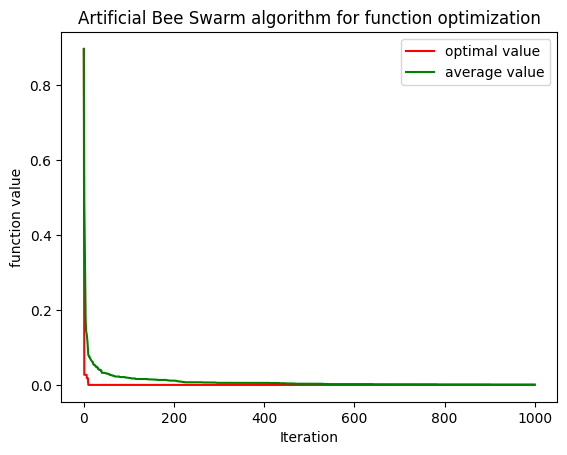

Running time: 35.85300087928772 seconds


In [22]:
# Fitness function (objective function)
def fitness(Bin,AllItem,ran):
    # ran is the packing order.
    itemNum=AllItem.shape[0] 
    BinNum=1;
    RPNXY=[];
    flagItem=np.zeros(itemNum) #Marking whether items are loaded into bin
    utilization_rates = []  
    visualizations = [] 
    
    # Start packing.
    for i in range(itemNum):
        if flagItem[ran[i]]==0:
            item=AllItem[ran[i],:]
            itemRP=Bin  
            flagOL=overlap(item,AllItem,itemRP,RPNXY) 
            if flagOL==0:
                itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                if len(itemRP)>0:
                    RPNXY.append([ran[i],itemRP[0],itemRP[1]])
                    flagItem[ran[i]]=1
    rect_area = 0
    bin_area = Bin[0]*Bin[1]
    for id in RPNXY:
        width,height = AllItem[id[0]]
        rect_area += width*height
    score = rect_area/bin_area
    print('utilisation:{}'.format(score))
    return score

#             #可视化
#             fig, ax = plt.subplots(1, 1)
#             ax1 = fig.gca()
#             for i in RPNXY:
#                 width,height = AllItem[i[0]]
#                 rx,ry = i[1],i[2]
#                 lx,ly = rx-width,ry-height
#                 plt.xlim((0, Bin[0]))
#                 plt.ylim((0, Bin[1]))
#                 color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                 rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
#                 ax1.add_patch(rect)
#             print("利用率: {}".format(utilization_rate))
#             plt.show()
#             #plt.savefig('result.png')
#     print("平均利用率: {}".format(np.mean(utilization_rates)))
            
#     if list(flagItem).count(0)<=0:
#         print("--------------------------------------物品装完---------------------------------\n")
    return score
 
class ABSIndividual:
    def __init__(self,bin,item):
        self.score = 0.
        self.invalidCount = 0 #Number of invalid counts (cumulative number of times results have not been updated)
        self.bin = bin  #Box width and height
        self.allitem = item
        self.ran =  list(range(self.allitem.shape[0]))
        self.calculateFitness()        
 
    def calculateFitness(self):
        self.score = fitness(self.bin,self.allitem,self.ran)#Calculate current score
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount,Bin, item, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount#Number of nectar sources, equal to the number of employed bees
        self.onlookerCount = onlookerCount#Number of onlooker bees 
        self.item = item #Upper and lower bounds for each parameter
        self.maxIterCount = maxIterCount
        self.maxInvalidCount = maxInvalidCount
        self.Bin = Bin
        #The #foodList is a list of foodCount individual bees (i.e., hired bees), each representing a solution with a different packing order.
        self.foodList = [ABSIndividual(self.Bin,self.item) for k in range(self.foodCount)]   #Initialise each nectar source
        #The foodScore is a list storing the best fitness value (score) achieved by each individual bee.
        self.foodScore = [d.score for d in self.foodList]                             #Best results by nectar source
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                      #The best nectar source in the whole world
    
    #Find a suitable permutation
    def updateFood(self, i):  #Update the ith nectar source
        vi = copy.deepcopy(self.foodList[i])
        order =list(range(vi.allitem.shape[0]))
        random.shuffle(order) #Randomly generated pack sequence
        vi.ran = order
        vi.calculateFitness()
        if vi.score > self.foodList[i].score: #If the results are better than the current honey source
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:#If grades are better than history grades
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:#If the results are globally optimal
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    # Implementation of the employed Bees phase
    def employedBeePhase(self):
        for i in range(0, self.foodCount):#Each nectar source is updated in turn
            self.updateFood(i)            
 
    #Implementation of the onlooker bee phase
    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)    
        #Relative scores and index numbers were obtained for each nectar source.
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]
        for k in range(0, self.onlookerCount):
            #Randomly selected from nectar sources with relative scores greater than the randomisation threshold to follow the
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()])
            self.updateFood(i)
 
    #Implementation of the scout bee phase
    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            #If this nectar has not been updated more than the specified threshold, it is reinitialised
            if self.foodList[i].invalidCount > self.maxInvalidCount:
                self.foodList[i] = ABSIndividual(self.Bin, self.item)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)
 
    #Perform a fixed number of iterations
    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
        print("Optimal utilisation:",self.bestFood.score)
        self.printResult(np.array(trace))
 
    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot(x, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        plt.plot(x, [(1-d)/d for d in trace[:, 1]], 'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()
 

if __name__ == "__main__":
    random.seed()
    iternum = 1000
    maxInvalidCount = 50
    abs = ArtificialBeeSwarm(30, 30, Bin, AllItem, iternum, maxInvalidCount)
    start_time = time.time()
    abs.solve()
    end_time = time.time()
    print("Running time: {} seconds".format(end_time - start_time))